---------------

---------------

---------------

---------------

# Initializations

In [1]:
datafolder = 'data/'
tmpfolder = 'tmp/'

In [2]:
from sympy import init_printing
init_printing()

%pylab inline

Populating the interactive namespace from numpy and matplotlib


1 - Robot Model
===============

In [5]:
import sympybotics
import sympy

#### Robot Definition

In [39]:
rbtdef = sympybotics.RobotDef("ljhn_leftleg",
            [(0, 0, 0, "q"),
             ("pi/2", 0, -0.02496, "q+pi/2"),
             ("pi/2", 0.12511, 0.07663, "q"),
             ("pi", 0.29989, 0, "q"),
             (0, 0.29989, 0, "q+pi"),
             ("pi/2", 0, 0, "q"),
             ],
            dh_convention="mdh")

rbtdef.gravityacc = sympy.Matrix([0.,0.,9.81])
rbtdef.frictionmodel = {}

#### Model Generation

In [40]:
%time rbt = sympybotics.RobotDynCode(rbtdef)
%time rbt.calc_base_parms()

CPU times: user 5.21 s, sys: 4.47 ms, total: 5.22 s
Wall time: 5.19 s
CPU times: user 6.99 s, sys: 92.2 ms, total: 7.08 s
Wall time: 6.05 s


In [41]:
import pickle
with open(tmpfolder + 'robotmodels/ljhn_leftleg_model.pkl', 'wb') as file:
    pickle.dump( rbt, file )

## Base Dynamic Parameters

In [42]:
import pickle
with open(tmpfolder +  'robotmodels/ljhn_leftleg_model.pkl', 'rb' ) as file:
          rbt = pickle.load( file )

In [43]:
rbt.dyn.n_dynparms, rbt.dyn.n_base

(60, 36)

In [44]:
rbt.dyn.baseparms.n()

Matrix([
[                                 L_1zz + L_2yy - 0.04992*l_2z + 0.0006230016*m_2 + 0.0162755137*m_3 + 0.0162755137*m_4 + 0.0162755137*m_5 + 0.0162755137*m_6],
[L_2xx - L_2yy + L_3yy + L_4yy + L_5yy + 0.15326*l_3z - 0.15326*l_4z - 0.15326*l_5z - 0.0097803552*m_3 + 0.0801536569*m_4 + 0.170087669*m_5 + 0.170087669*m_6],
[                              L_2xy + 0.12511*l_3z - 0.12511*l_4z - 0.12511*l_5z + 0.0095871793*m_3 + 0.0095871793*m_4 + 0.0095871793*m_5 + 0.0095871793*m_6],
[                                                                                                                                                       L_2xz],
[                                                                                                                                                       L_2yz],
[       L_2zz + L_3yy + L_4yy + L_5yy + 0.15326*l_3z - 0.15326*l_4z - 0.15326*l_5z + 0.021524669*m_3 + 0.1114586811*m_4 + 0.2013926932*m_5 + 0.2013926932*m_6],
[                              

In [45]:
rbt.dyn.Pb

Matrix([
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[

In [46]:
idyn_func_def = sympybotics.robotcodegen.robot_code_to_func( 'python', rbt.invdyn_code, 'idyn', 'idyn_func', rbt.rbtdef)
print idyn_func_def

def idyn_func(parms, q, dq, ddq):
#
    idyn = [0]*6
#
    x0 = sin(q[4])
    x1 = cos(q[5])
    x2 = cos(q[2])
    x3 = cos(q[1])
    x4 = sin(q[1])
    x5 = -x4
    x6 = dq[0]*x5
    x7 = dq[1]*x6
    x8 = ddq[0]*x3 + x7
    x9 = dq[0]*x3
    x10 = sin(q[2])
    x11 = -x10
    x12 = dq[1]*x2 + x11*x9
    x13 = ddq[1]*x10 + dq[2]*x12 + x2*x8
    x14 = -x13
    x15 = sin(q[3])
    x16 = dq[1]*x10 + x2*x9
    x17 = -x16
    x18 = -x8
    x19 = ddq[1]*x2 + dq[2]*x17 + x10*x18
    x20 = -x19
    x21 = cos(q[3])
    x22 = -x12
    x23 = x15*x22 + x16*x21
    x24 = -x23
    x25 = dq[3]*x24 + x14*x15 + x20*x21
    x26 = -x25
    x27 = x15*x17 + x21*x22
    x28 = dq[3]*x27 + x13*x21 + x15*x20
    x29 = -x28
    x30 = cos(q[4])
    x31 = -x27
    x32 = x0*x23 + x30*x31
    x33 = dq[4]*x32 + x0*x26 + x29*x30
    x34 = -x33
    x35 = sin(q[5])
    x36 = x0*x31 + x24*x30
    x37 = -x6
    x38 = dq[2] + x37
    x39 = -x38
    x40 = dq[3] + x39
    x41 = dq[4] + x40
    x42 = x1*x36 + x35*x41
    x

In [47]:
from sympybotics._compatibility_ import exec_

l = locals()
exec_(idyn_func_def, globals(), l)

tau_onedof = l['idyn_func']


In [251]:
import yaml, sympy
with open(datafolder + 'robotparams/ljhn_leftleg_cad.yml', 'r') as f:
    ljhn_leftleg_cad = yaml.load(f)
dynparm_test = sympy.Matrix([ljhn_leftleg_cad.get(str(d), d) for d in rbt.dyn.dynparms])

In [252]:
import numpy as np

# q_test = [0*np.pi/180.,0*np.pi/180.,0*np.pi/180.,0*np.pi/180.,0*np.pi/180.,0*np.pi/180.]
q_test = [30*np.pi/180.,120*np.pi/180.,40*np.pi/180.,70*np.pi/180.,150*np.pi/180.,70*np.pi/180.]
dq_test = [30*np.pi/180.,120*np.pi/180.,40*np.pi/180.,70*np.pi/180.,150*np.pi/180.,70*np.pi/180.]
ddq_test = [30*np.pi/180.,120*np.pi/180.,40*np.pi/180.,70*np.pi/180.,150*np.pi/180.,70*np.pi/180.]

In [253]:
tau1 = tau_onedof(dynparm_test, q_test, dq_test, ddq_test)
tau1

[0.432146043020257,
 46.1720502062698,
 -4.59530912893754,
 -0.724704769358030,
 0.132835362606312,
 -0.0836529444684111]

In [65]:
q_num_subs = dict(zip(rbt.rbtdef.q, q_test))

In [66]:
Tbase_rot = numpy.matrix([  [0,1,0,0],
                            [1,0,0,0],
                            [0,0,-1,0],
                            [0,0,0,1],
                     ])

Tbase_trans = numpy.matrix([[1,0,0,0.10015],
                            [0,1,0,-0.00006],
                            [0,0,1,0.238],
                            [0,0,0,1],
                     ])

Tdes_rot = numpy.matrix([  [0,0,1,0],
                            [0,-1,0,0],
                            [1,0,0,0],
                            [0,0,0,1],
                     ])

In [67]:
T = rbt.geo.T[-1]
T = T.subs(q_num_subs)
T = numpy.matrix(T).astype(numpy.float64)
T = Tbase_rot*Tbase_trans*T*Tdes_rot
T

matrix([[-8.66025404e-01, -4.92403877e-01,  8.68240888e-02,
         -3.00793786e-01],
        [ 5.00000000e-01, -8.52868532e-01,  1.50383733e-01,
         -3.85015045e-01],
        [ 2.77555756e-17,  1.73648178e-01,  9.84807753e-01,
          2.91218650e-03],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          1.00000000e+00]])

2 - Excited Trajectory Optimization
==================================

In [80]:
import pickle
with open(tmpfolder +  'robotmodels/ljhn_leftleg_model.pkl', 'rb' ) as file:
          rbt = pickle.load( file )

In [89]:
from trajectory_optimization import TrajOptimizer
from trajectory_optimization import TrajPlotter
from numpy import deg2rad



base_freq = 0.05
fourier_order = 6

joint_constraints = []
cartesian_constraints = []


joint_constraints = [(1, deg2rad(-180), deg2rad(180), deg2rad(-120), deg2rad(120)),
                     (2, deg2rad(-180), deg2rad(180), deg2rad(-120), deg2rad(120)),
                     (3, deg2rad(-180), deg2rad(180), deg2rad(-120), deg2rad(120)),
                     (4, deg2rad(-180), deg2rad(180), deg2rad(-120), deg2rad(120)),
                     (5, deg2rad(-180), deg2rad(180), deg2rad(-120), deg2rad(120)),
                     (6, deg2rad(-180), deg2rad(180), deg2rad(-120), deg2rad(120))
                     ]

    
traj_optimizer = TrajOptimizer(rbt, fourier_order, base_freq,
                               joint_constraints=joint_constraints,
                               cartesian_constraints = cartesian_constraints)
                                                                                                 
                                                                                                                     
traj_optimizer.optimize()

joint constraint number: 6
cartesian constraint number: 0
constraint number: 24
frames_constrained: []
cond: 11.5772644427
cond: 11.5772644427
cond: 11.5772641715
cond: 11.5772641124
cond: 11.5772643915
cond: 11.5772647518
cond: 11.5772643608
cond: 11.5772646038
cond: 11.5772652952
cond: 11.5772650082
cond: 11.5772647578
cond: 11.5772646556
cond: 11.5772646063
cond: 11.5772644291
cond: 11.5772651066
cond: 11.5772681306
cond: 11.5772675455
cond: 11.5772667891
cond: 11.5772666911
cond: 11.5772658942
cond: 11.5772662682
cond: 11.5772618654
cond: 11.5772643635
cond: 11.5772643914
cond: 11.5772639827
cond: 11.5772640816
cond: 11.5772645727
cond: 11.5772630489
cond: 11.5772714447
cond: 11.5772707943
cond: 11.5772691822
cond: 11.5772673176
cond: 11.57726698
cond: 11.5772654728
cond: 11.5772668358
cond: 11.577263725
cond: 11.5772624773
cond: 11.5772618209
cond: 11.5772617328
cond: 11.5772619465
cond: 11.5772651525
cond: 11.5772605734
cond: 11.5772595686
cond: 11.5772604552
cond: 11.5772621031


cond: 5.11376102501
cond: 5.11376105877
cond: 5.11376087365
cond: 5.11376132401
cond: 5.11376079555
cond: 5.11376078404
cond: 5.11376082902
cond: 5.11376117364
cond: 5.11376082173
cond: 5.11376107926
cond: 5.113760719
cond: 5.11376130698
cond: 5.11376219453
cond: 5.11376136651
cond: 5.11376119594
cond: 5.11376074467
cond: 5.11376072846
cond: 5.11376089942
cond: 5.11376142654
cond: 5.11376005959
cond: 5.11376130668
cond: 5.11376095267
cond: 5.11376057262
cond: 5.11376078319
cond: 5.11376082777
cond: 5.11376099249
cond: 5.11376026388
cond: 5.11376092178
cond: 5.11376066971
cond: 5.11376092535
cond: 5.11376089739
cond: 5.11376050548
cond: 5.11375998666
cond: 5.1137609857
cond: 5.11376071146
cond: 5.11376140411
cond: 5.11376031473
cond: 5.11376123017
cond: 5.11376085813
cond: 5.11376167703
cond: 5.11376053754
cond: 5.11376103284
cond: 5.11376072483
cond: 5.11376104205
cond: 5.11376084672
cond: 5.11376143148
cond: 5.11376085164
cond: 5.11376128296
cond: 5.11376110358
cond: 5.11376108037
con

cond: 4.54942716779
cond: 4.54942740054
cond: 4.54942716738
cond: 4.54942684361
cond: 4.54942725307
cond: 4.54942689423
cond: 4.54942710847
cond: 4.54942678564
cond: 4.54942641773
cond: 4.54942736486
cond: 4.54942674407
cond: 4.54942738497
cond: 4.54942787236
cond: 4.5494275341
cond: 4.5494275159
cond: 4.54942553927
cond: 4.5494275646
cond: 4.54942718392
cond: 4.54942675514
cond: 4.54942711131
cond: 4.54942731951
cond: 4.54942839937
cond: 4.5494268274
cond: 4.54942916382
cond: 4.54942788047
cond: 4.5494275227
cond: 4.54942726262
cond: 4.54942663103
cond: 4.5494287006
cond: 4.5494285557
cond: 4.54942676614
cond: 4.54942772827
cond: 4.5494284056
cond: 4.54942655779
cond: 4.54942590294
cond: 4.54942789882
cond: 4.54942539537
cond: 4.54942646757
cond: 4.54942736995
cond: 4.54942705106
cond: 4.54942736508
cond: 4.54942597638
cond: 4.54942585962
cond: 4.54942796104
cond: 4.54942691582
cond: 4.54942601327
cond: 4.54942807946
cond: 4.54942602716
cond: 4.54942790854
cond: 4.54942490923
cond: 4.

cond: 4.12266541573
cond: 4.12266628429
cond: 4.12266539664
cond: 4.12266421919
cond: 4.12266567552
cond: 4.12266549662
cond: 4.12266632109
cond: 4.12266546356
cond: 4.12266593884
cond: 4.12266639494
cond: 4.12266577155
cond: 4.12266571425
cond: 4.12266532683
cond: 4.12266584143
cond: 4.12266580403
cond: 4.12266599358
cond: 4.12266564044
cond: 4.12266525967
cond: 4.12266606296
cond: 4.12266549078
cond: 4.12266579199
cond: 4.12266554903
cond: 4.12266604444
cond: 4.12266586077
cond: 4.12266552502
cond: 4.12266594891
cond: 4.12266570854
cond: 4.1226661729
cond: 4.12266587658
cond: 4.12266628652
cond: 4.12266680446
cond: 4.12266594533
cond: 4.12266642704
cond: 4.12266629114
cond: 4.12266626393
cond: 4.12266594469
cond: 4.12266599319
cond: 4.12266649844
cond: 4.12266622928
cond: 4.12266626775
cond: 4.12266617764
cond: 4.12266604893
cond: 4.12266605623
cond: 4.12266629994
cond: 4.12266616963
cond: 4.12266640833
cond: 4.12266634666
cond: 4.12266619334
cond: 4.12266607702
cond: 4.12266629316
c

cond: 3.74576285941
cond: 3.74576160345
cond: 3.74576192297
cond: 3.74576288746
cond: 3.74576116018
cond: 3.7457620648
cond: 3.74576186242
cond: 3.74576175588
cond: 3.74576172065
cond: 3.74576183236
cond: 3.74576188741
cond: 3.74576174651
cond: 3.7457618819
cond: 3.74576184325
cond: 3.74576295427
cond: 3.74576144627
cond: 3.74576292659
cond: 3.74576167041
cond: 3.74576180454
cond: 3.74576182228
cond: 3.74576173114
cond: 3.74576177193
cond: 3.74576190548
cond: 3.74576247805
cond: 3.74576168825
cond: 3.74576178756
cond: 3.74576172208
cond: 3.74576135326
cond: 3.74576168116
cond: 3.74576076081
cond: 3.74576176565
cond: 3.7457617648
cond: 3.74576211775
cond: 3.74576159747
cond: 3.74576210617
cond: 3.74576206389
cond: 3.74576253759
cond: 3.74576233153
cond: 3.74576191224
cond: 3.74576176251
cond: 3.74576156051
cond: 3.74576176623
cond: 3.74576032918
cond: 3.74576161938
cond: 3.74576185916
cond: 3.74576215125
cond: 3.74576195747
cond: 3.7457619846
cond: 3.74576191718
cond: 3.74576211577
cond

cond: 3.62542261175
cond: 3.62542287775
cond: 3.6254234211
cond: 3.62542268225
cond: 3.62542417635
cond: 3.62542277638
cond: 3.62542276318
cond: 3.62542261573
cond: 3.62542373512
cond: 3.62542322543
cond: 3.62542522026
cond: 3.6254222607
cond: 3.6254233078
cond: 3.62542324906
cond: 3.62542330527
cond: 3.62542310762
cond: 3.62542333728
cond: 3.62542232169
cond: 3.62542307501
cond: 3.62542339322
cond: 3.62542353352
cond: 3.62542268319
cond: 3.62542273567
cond: 3.62542175007
cond: 3.62542379716
cond: 3.6254227409
cond: 3.62542342221
cond: 3.62542263277
cond: 3.62542304856
cond: 3.62542340873
cond: 3.62542214877
cond: 3.62542285937
cond: 3.62542344381
cond: 3.62542341416
cond: 3.62542283474
cond: 3.62542279547
cond: 3.62542223283
cond: 3.62542378971
cond: 3.62542284717
cond: 3.62542317978
cond: 3.62542314177
cond: 3.62542278415
cond: 3.62542311489
cond: 3.62542368193
cond: 3.62542361519
cond: 3.62542323343
cond: 3.62542293677
cond: 3.62542312156
cond: 3.62542311093
cond: 3.62542268895
cond

cond: 3.52638115981
cond: 3.5263811857
cond: 3.52638093665
cond: 3.52637984034
cond: 3.52637988405
cond: 3.52637766949
cond: 3.52638075241
cond: 3.52638029967
cond: 3.52638068695
cond: 3.52638003251
cond: 3.52638046766
cond: 3.52638021583
cond: 3.52637826623
cond: 3.52637911853
cond: 3.52637966518
cond: 3.52637974703
cond: 3.52638104614
cond: 3.52638045274
cond: 3.52638268473
cond: 3.52637997789
cond: 3.52638025456
cond: 3.52638002557
cond: 3.52638022527
cond: 3.52638038256
cond: 3.52638044004
cond: 3.52637823721
cond: 3.52637956501
cond: 3.52637965612
cond: 3.52637990449
cond: 3.52638086855
cond: 3.52638055903
cond: 3.52638169288
cond: 3.5263793817
cond: 3.5263803939
cond: 3.52637982304
cond: 3.52638065054
cond: 3.52638007872
cond: 3.52638008839
cond: 3.5263798856
cond: 3.52638005673
cond: 3.52638030434
cond: 3.52638025937
cond: 3.52638055383
cond: 3.52638058444
cond: 3.52638097865
cond: 3.52638045092
cond: 3.52638046229
cond: 3.52638036643
cond: 3.52638037083
cond: 3.52638036364
cond

cond: 3.45648811417
cond: 3.45648895711
cond: 3.45648962053
cond: 3.45648930563
cond: 3.45648888931
cond: 3.45648844107
cond: 3.45648889736
cond: 3.45648864727
cond: 3.45648849304
cond: 3.45648860849
cond: 3.45648814888
cond: 3.45648810872
cond: 3.45648826321
cond: 3.45648911354
cond: 3.45648808205
cond: 3.45648740383
cond: 3.45648849191
cond: 3.45648818697
cond: 3.45648854117
cond: 3.45648856499
cond: 3.45648938722
cond: 3.45648846649
cond: 3.45648885043
cond: 3.45648850099
cond: 3.4564883917
cond: 3.45648844964
cond: 3.45649052366
cond: 3.45648872119
cond: 3.45648803988
cond: 3.45648873646
cond: 3.45648880475
cond: 3.4564883059
cond: 3.45648844281
cond: 3.45648888777
cond: 3.45648958309
cond: 3.45648881211
cond: 3.45648835082
cond: 3.45648858203
cond: 3.45648877812
cond: 3.45648819263
cond: 3.45648898636
cond: 3.45648867979
cond: 3.45648899484
cond: 3.45648872881
cond: 3.45648860203
cond: 4.51385370858
cond: 3.60182108954
cond: 3.45613938107
cond: 3.44823218137
cond: 3.44823218137
co

cond: 3.38860209046
cond: 3.38860195289
cond: 3.38860182588
cond: 3.38860246458
cond: 3.38860260409
cond: 3.38860294903
cond: 3.38860256286
cond: 3.38860352509
cond: 3.38860312979
cond: 3.38860180941
cond: 3.38860288869
cond: 3.38860233271
cond: 3.38860295683
cond: 3.38860225569
cond: 3.38860200839
cond: 3.38860221322
cond: 3.38860262247
cond: 3.38860248716
cond: 3.38860277817
cond: 3.38860237342
cond: 3.38860392981
cond: 3.38860290089
cond: 3.38860216947
cond: 3.38860262665
cond: 3.38860285391
cond: 3.38860251129
cond: 3.38860260119
cond: 3.38860262642
cond: 3.38860254142
cond: 3.38860255149
cond: 3.38860241634
cond: 3.38860247155
cond: 3.38860261144
cond: 3.38860201243
cond: 3.38860253077
cond: 3.38860244865
cond: 3.38860273535
cond: 3.38860263635
cond: 3.38860254951
cond: 4.00361271093
cond: 3.4098248175
cond: 3.37970840566
cond: 3.37970840566
cond: 3.3797083629
cond: 3.37970833696
cond: 3.37970836549
cond: 3.37970892221
cond: 3.37970859205
cond: 3.37970866043
cond: 3.37970841271
co

cond: 3.33447169836
cond: 3.33447269125
cond: 3.33447288529
cond: 3.33447309774
cond: 3.33447316302
cond: 3.3344730315
cond: 3.33447381149
cond: 3.33447377902
cond: 3.33447309857
cond: 3.33447390535
cond: 3.33447414222
cond: 3.33447343551
cond: 3.33447355427
cond: 3.33447307237
cond: 3.33447310505
cond: 3.33447297922
cond: 3.33447274572
cond: 3.3344729889
cond: 3.33447296456
cond: 3.33447354981
cond: 3.33447413814
cond: 3.33447368439
cond: 3.33447371551
cond: 3.33447343567
cond: 3.33447365711
cond: 3.33447372812
cond: 3.33447394187
cond: 3.33447407095
cond: 3.33447363568
cond: 3.33447383673
cond: 3.334473693
cond: 3.334473781
cond: 4.42400550846
cond: 3.35250675259
cond: 3.31805457979
cond: 3.31805457979
cond: 3.31805435676
cond: 3.31805420195
cond: 3.31805469053
cond: 3.31805439299
cond: 3.31805471789
cond: 3.31805455208
cond: 3.31805461527
cond: 3.31805436428
cond: 3.31805428209
cond: 3.31805446779
cond: 3.31805531956
cond: 3.3180548328
cond: 3.31805475899
cond: 3.31805317377
cond: 3

cond: 3.24889496501
cond: 3.24889524324
cond: 3.24889511454
cond: 3.24889539015
cond: 3.24889505233
cond: 3.24889586889
cond: 3.24889453388
cond: 3.24889513311
cond: 3.24889465953
cond: 3.24889523181
cond: 3.24889499525
cond: 3.24889490334
cond: 3.24889513723
cond: 3.2488951443
cond: 3.24889549473
cond: 3.24889518045
cond: 3.24889531912
cond: 3.24889505687
cond: 3.24889506529
cond: 3.2488950613
Condition number: 3.24889513927
x: [-0.10388635 -0.24420562  0.256739    0.07190579 -0.71524447  0.42264097
 -0.30031545  0.18617646  0.0513014   0.03144993  0.66264716  0.28579316
  0.66786035  0.13994021  0.06375809 -0.77216587 -0.07212621 -0.26423301
  0.32185191 -0.20213765  0.47446976 -0.13221253  0.26405745  0.54809304
  0.83305343 -0.41905112  0.68458994 -0.35207402 -0.74742355 -0.35766447
  0.25118621 -0.74603853  0.9555834   0.38371769  0.54022986  0.15479003
 -0.18173721  0.18024739  0.22433672 -0.01598919  0.37290459  1.24140517
  0.37864194 -0.22579704  0.13247242  0.35436751 -0.2642

## plot excited trajectory

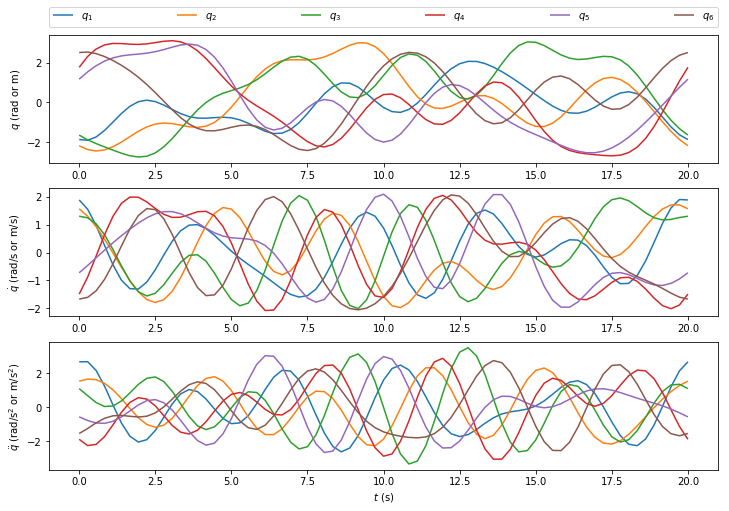

In [90]:
# %matplotlib qt 

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]

traj_plotter = TrajPlotter(traj_optimizer.fourier_traj,traj_optimizer.frame_traj,
                           traj_optimizer.const_frame_ind)
traj_plotter.plot_desired_traj(traj_optimizer.x_result)

## save trajectory

In [91]:
from utils import save_data, load_data

trajectory_name = 'ljhn_leftleg_traj3'
trajectory_folder =  'data/trajectories/'

dof_order_bf_x_norm = (traj_optimizer.fourier_traj.dof, fourier_order,
                       base_freq, traj_optimizer.x_result, [])
save_data(trajectory_folder, trajectory_name, dof_order_bf_x_norm)

freq = 50
tf = 65 # including 5 seconds' prestable time
traj_optimizer.make_traj_csv(trajectory_folder, trajectory_name, freq, tf)

## display trajectory param

In [92]:
from IPython.display import HTML, display
import tabulate
import numpy as np

table = []
table.append(["joint", 'qo'] +
             ["a"+str(i+1) for i in range(fourier_order)] +
             ["b"+str(i+1) for i in range(fourier_order)])
for i in range(traj_optimizer.fourier_traj.dof):
    line = []
    line.append(rbt.rbtdef.q[i])
    line += np.round(traj_optimizer.x_result[i*(1 + fourier_order*2): (i+1)*(1 + fourier_order*2)], 4).tolist()
    table.append(line)

display(HTML(tabulate.tabulate(table, tablefmt='html')))

joint,qo,a1,a2,a3,a4,a5,a6,b1,b2,b3,b4,b5,b6
q1,-0.1039,-0.2442,0.2567,0.0719,-0.7152,0.4226,-0.3003,0.1862,0.0513,0.0314,0.6626,0.2858,0.6679
q2,0.1399,0.0638,-0.7722,-0.0721,-0.2642,0.3219,-0.2021,0.4745,-0.1322,0.2641,0.5481,0.8331,-0.4191
q3,0.6846,-0.3521,-0.7474,-0.3577,0.2512,-0.746,0.9556,0.3837,0.5402,0.1548,-0.1817,0.1802,0.2243
q4,-0.016,0.3729,1.2414,0.3786,-0.2258,0.1325,0.3544,-0.2642,-0.0878,-0.1169,-0.669,0.4395,-0.7958
q5,-0.072,0.4186,0.9861,0.1123,-0.4584,0.2113,0.1455,-0.2316,-0.1017,-0.2332,0.3473,-0.9435,0.4368
q6,0.2336,-0.2604,0.4215,-0.0659,0.9518,-0.2774,-0.4902,-0.1704,-0.7991,0.2977,-0.8691,-0.1744,0.0451


3 - Regression Data Processing
==============================

In [264]:
import os
import pickle
import math
import sympy
import numpy
import sympybotics

In [265]:
with open(tmpfolder +  'robotmodels/ljhn_leftleg_model.pkl', 'rb' ) as file:
          rbt = pickle.load( file )

### Data Load

In [266]:
parms_traj = 'traj1'

In [267]:
from support_funcs.regr_data_proc import load_trajectory_data

training_results_data_file = datafolder +'recdata/' + 'ljhn_leftleg_'+parms_traj+'_results.csv'

trajectory_sampling_rate = 50
t_raw, q_raw, dq_raw, tau_raw = load_trajectory_data(training_results_data_file,
                                                                   trajectory_sampling_rate)

(<type 'numpy.ndarray'>, (2990, 18))


### Some Plots

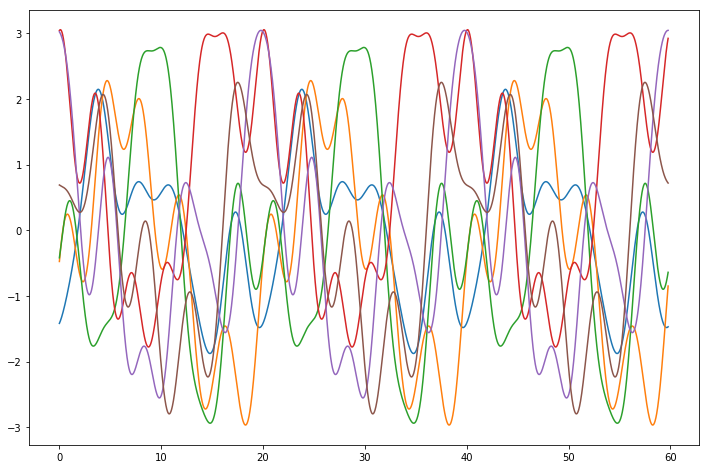

In [268]:
from matplotlib import pyplot as plt
plt.close()

# for d in range(rbt.dof):
#     co_num = str(d + 1)
#     plt.plot(t_raw, q_raw[:, d], label=(r"$q_" + co_num +"$"), linestyle= (0, ()))
    
for i in range(q_raw.shape[1]):
    plt.plot(t_raw,q_raw[:,i])

plt.show()

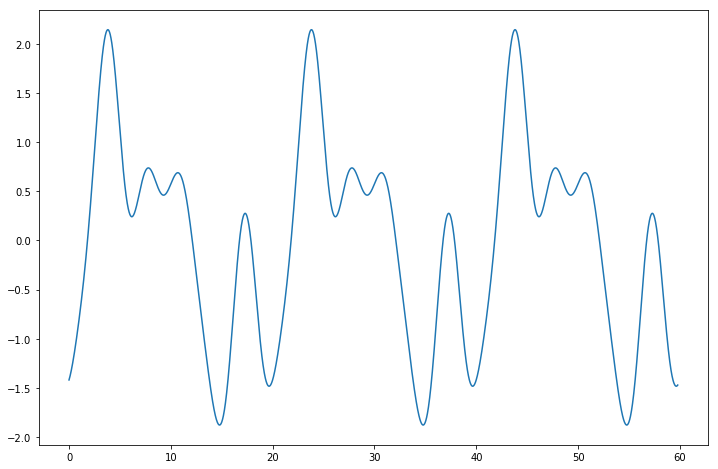

In [269]:
from matplotlib import pyplot as plt
plt.close()

joint = 1
# plt.plot(t_ref+0.20,q_ref[:,joint-1])
plt.plot(t_raw,q_raw[:,joint-1])

plt.show()

In [270]:
del t_raw, q_raw, dq_raw,tau_raw

### Parameter Load

In [271]:
from utils import save_data, load_data

training_trajectory_name = 'ljhn_leftleg_traj1'


trajectory_folder = datafolder +'trajectories/'
dof, fourier_order, base_freq, traj_optimizer_result, reg_norm_mat = load_data(trajectory_folder,
                                                                               training_trajectory_name)
print("dof: {}".format(dof))
print("Fourier order: {}".format(fourier_order))
print("Base frequency: {}".format(base_freq))

dof: 6
Fourier order: 6
Base frequency: 0.05


### Filter Cut-off Frequency Definition

In [272]:
# times of the highest frequency in the Fourier series
fc_mult = 10.0

fc = base_freq * fourier_order * fc_mult
print("Cut frequency: {}".format(fc))

Cut frequency: 3.0


In [273]:
fc_q = fc
fc_dq = fc
fc_ddq = fc

fc_tau =  fc

si = 200
sf = -200

### Data Filtering, Differentiation and Regression Data Generation

In [274]:
rec_h = 0.02

In [275]:
from support_funcs.regr_data_proc import load_trajectory_data, plot_trajectory_data, \
                                            diff_and_filt_data, gen_regr_matrices


def process_regression_data(traj_name):
#     t_raw, q_raw, tau_raw, t_ref, q_ref = read_data(dof=rbt.dof, h=rec_h,
#                                                     rbtlogfile=datafolder + 'recdata/rbtlog_%s.dat'%traj_name,
#                                                     trajreffile=datafolder + 'trajectories/%s.dat'%traj_name)
    
    training_results_data_file = datafolder +'recdata/' + 'ljhn_leftleg_%s_results.csv'%traj_name
    trajectory_sampling_rate = 50
    t_raw, q_raw, dq_raw, tau_raw = load_trajectory_data(training_results_data_file,
                                                                   trajectory_sampling_rate)
    
    q, dq, ddq, tau = diff_and_filt_data(dof=rbt.dof, h=rec_h,  q_raw=q_raw, tau_raw=tau_raw,
                                   fc_q=fc_q, fc_dq=fc_dq, fc_ddq=fc_ddq, fc_tau=fc_tau)
    
    t_raw = t_raw[si:sf]; q_raw = q_raw[si:sf]; tau_raw = tau_raw[si:sf]
    q = q[si:sf]; dq = dq[si:sf]; ddq = ddq[si:sf]; tau = tau[si:sf]
    
    t_raw = t_raw - t_raw[0]
    
    t = numpy.array(range(q.shape[0])) * rec_h
    
    W, omega, Q1, R1, rho1 = gen_regr_matrices(rbt, q, dq, ddq, tau)
    
    return t_raw, q_raw, tau_raw, t, q, dq, ddq, tau, W, omega, Q1, R1, rho1

>>>>>>>> traj1 proc <<<<<<<<<
(<type 'numpy.ndarray'>, (2990, 18))
CPU times: user 1.44 s, sys: 40.3 ms, total: 1.48 s
Wall time: 889 ms
 (cond=26.806876)
traj1 save
CPU times: user 759 ms, sys: 28.3 ms, total: 787 ms
Wall time: 439 ms
plot shape: 460


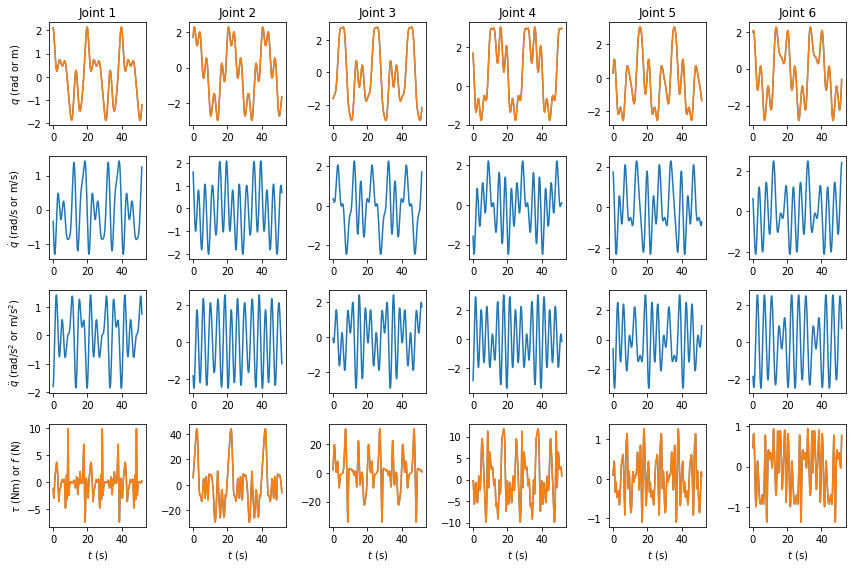

>>>>>>>> traj2 proc <<<<<<<<<
(<type 'numpy.ndarray'>, (2990, 18))
CPU times: user 1.75 s, sys: 108 ms, total: 1.86 s
Wall time: 981 ms
 (cond=30.886929)
traj2 save
CPU times: user 762 ms, sys: 32.4 ms, total: 795 ms
Wall time: 423 ms
plot shape: 460


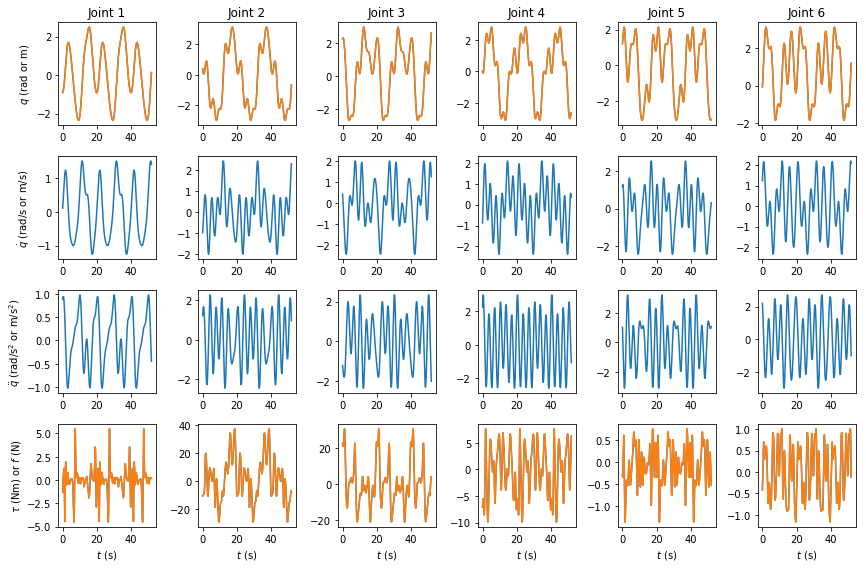

>>>>>>>> traj3 proc <<<<<<<<<
(<type 'numpy.ndarray'>, (2990, 18))
CPU times: user 1.32 s, sys: 60 ms, total: 1.38 s
Wall time: 801 ms
 (cond=24.471472)
traj3 save
CPU times: user 771 ms, sys: 19.5 ms, total: 790 ms
Wall time: 394 ms
plot shape: 460


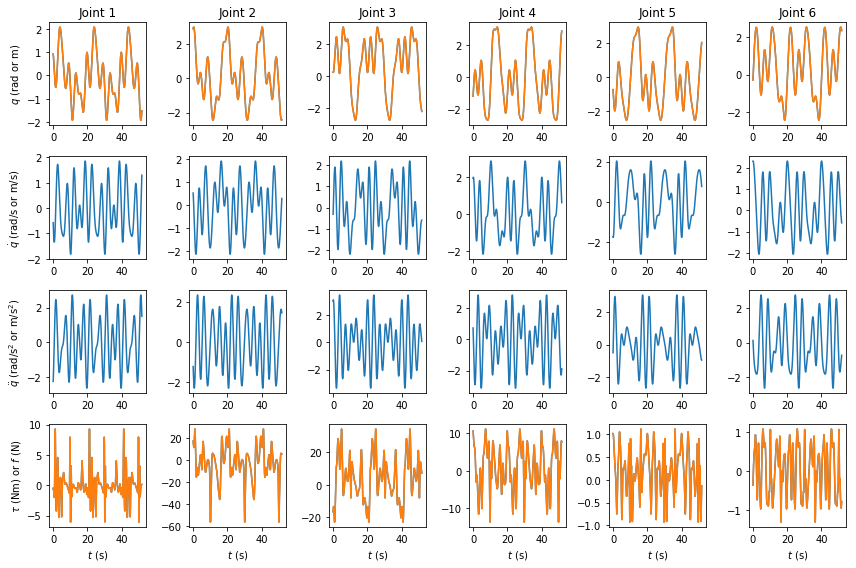

In [276]:
from support_funcs.utils import _fprint
from support_funcs.regr_data_proc import plot_trajectory_data

for traj in ['traj1', 'traj2', 'traj3']:      #, 'traj4'
    _fprint('>>>>>>>> %s proc <<<<<<<<<'%traj)
    %time t_raw, q_raw, tau_raw, t, q, dq, ddq, tau, W, omega, Q1, R1, rho1 = process_regression_data(traj)
    
    _fprint(' (cond=%f)'%numpy.linalg.cond(W))
    
    _fprint('%s save'%traj)
    
    %time \
    numpy.savez_compressed(tmpfolder + 'procdata/' + traj + '_raw', t=t_raw, q=q_raw, tau=tau_raw);\
    numpy.savez_compressed(tmpfolder + 'procdata/' + traj + '_proc', t=t, q=q, dq=dq, ddq=ddq, tau=tau); \
    numpy.savez_compressed(tmpfolder + 'procdata/' + traj + '_regr', W=W, omega=omega, Q1=Q1, R1=R1, rho1=rho1)
    
    import matplotlib.pyplot as plt
    plt.rcParams['figure.figsize'] = [12,8]
    plot_trajectory_data(t, q_raw, q, dq, ddq,
                     tau_raw, tau)
    
    del t_raw, q_raw, tau_raw, t, q, dq, ddq, tau, W, omega, Q1, R1, rho1

### Plot

In [277]:
raw = numpy.load(tmpfolder + 'procdata/traj1_raw.npz')
tau_raw = raw['tau']
q_raw = raw['q']
del raw
proc = numpy.load(tmpfolder + 'procdata/traj1_proc.npz')
t = proc['t']
tau = proc['tau']
q = proc['q']
dq = proc['dq']
del proc

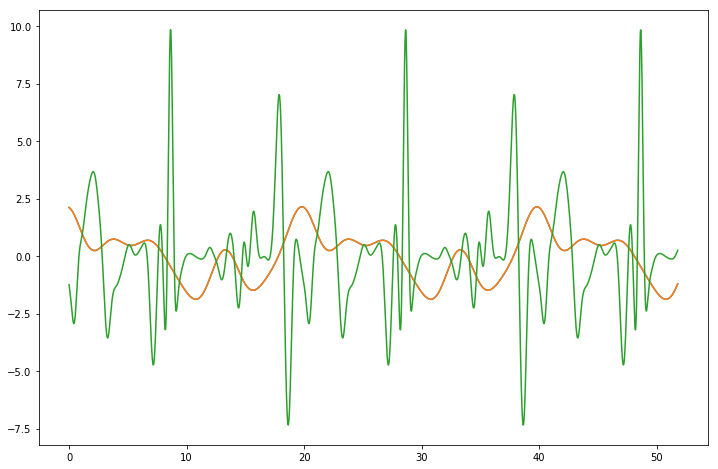

In [278]:
from matplotlib import pyplot as plt
plt.close()

joint = 1
firsts = 20000
plt.plot(t[:firsts],q_raw[:,joint-1][:firsts])
plt.plot(t[:firsts],q[:,joint-1][:firsts])
#plt.plot(t[:firsts],dq[:,joint-1][:firsts])
plt.plot(t[:firsts],tau_raw[:,joint-1][:firsts])

plt.show()

In [279]:
del t, q, dq, tau, q_raw, tau_raw

4 - Dynamic Parameter Estimation
================================

In [280]:
import os
import pickle
import sympy
import numpy
import time

import sympybotics
import lmi_sdp

from lmi_sdp import init_lmi_latex_printing
init_lmi_latex_printing()

In [281]:
with open(tmpfolder +  'robotmodels/ljhn_leftleg_model.pkl', 'rb' ) as file:
          rbt = pickle.load( file )

In [282]:
epsilon_safemargin = 1e-6
epsilon_sdptol = 1e-7

## LMI Matrix Definitions

In [283]:
dof = rbt.dof

delta = rbt.dyn.dynparms
n_delta = rbt.dyn.n_dynparms

beta = rbt.dyn.baseparms.n()
n_beta = rbt.dyn.n_base
beta_symbs = sympy.Matrix([sympy.Symbol('beta'+str(i+1),real=True) for i in range(n_beta)])

delta_d = (rbt.dyn.Pd.T*delta)
n_delta_d = len(delta_d)

Pb = rbt.dyn.Pb

varchange_dict = dict(zip(Pb.T*delta ,  beta_symbs - ( beta - Pb.T*delta )))

In [284]:
from support_funcs.utils import skew, mrepl
from sympy import BlockMatrix, Matrix, eye, Identity
I = Identity
S = skew

In [285]:
D_inertia_blocks = []
for i in range(dof):
    L = rbt.rbtdef.L[i]
    l = rbt.rbtdef.l[i]
    m = rbt.rbtdef.m[i]
    Di = BlockMatrix([[L,    S(l).T],
                      [S(l), I(3)*m]])
    D_inertia_blocks.append(Di.as_explicit())

In [286]:
D_inertia_blocks[0]

Matrix([
[L_1xx, L_1xy, L_1xz,     0,  l_1z, -l_1y],
[L_1xy, L_1yy, L_1yz, -l_1z,     0,  l_1x],
[L_1xz, L_1yz, L_1zz,  l_1y, -l_1x,     0],
[    0, -l_1z,  l_1y,   m_1,     0,     0],
[ l_1z,     0, -l_1x,     0,   m_1,     0],
[-l_1y,  l_1x,     0,     0,     0,   m_1]])

In [287]:
D_other_blocks = []
for i in range(dof):
    if rbt.rbtdef.driveinertiamodel == 'simplified':
        D_other_blocks.append( Matrix([rbt.rbtdef.Ia[i]]) )
    if 'viscous' in rbt.rbtdef.frictionmodel:
        D_other_blocks.append( Matrix([rbt.rbtdef.fv[i]]) )
    if 'Coulomb' in rbt.rbtdef.frictionmodel:
        D_other_blocks.append( Matrix([rbt.rbtdef.fc[i]]) )

D_other_blocks

[]

In [288]:
D_blocks = D_inertia_blocks + D_other_blocks

In [289]:
D_blocks

[Matrix([
 [L_1xx, L_1xy, L_1xz,     0,  l_1z, -l_1y],
 [L_1xy, L_1yy, L_1yz, -l_1z,     0,  l_1x],
 [L_1xz, L_1yz, L_1zz,  l_1y, -l_1x,     0],
 [    0, -l_1z,  l_1y,   m_1,     0,     0],
 [ l_1z,     0, -l_1x,     0,   m_1,     0],
 [-l_1y,  l_1x,     0,     0,     0,   m_1]]), Matrix([
 [L_2xx, L_2xy, L_2xz,     0,  l_2z, -l_2y],
 [L_2xy, L_2yy, L_2yz, -l_2z,     0,  l_2x],
 [L_2xz, L_2yz, L_2zz,  l_2y, -l_2x,     0],
 [    0, -l_2z,  l_2y,   m_2,     0,     0],
 [ l_2z,     0, -l_2x,     0,   m_2,     0],
 [-l_2y,  l_2x,     0,     0,     0,   m_2]]), Matrix([
 [L_3xx, L_3xy, L_3xz,     0,  l_3z, -l_3y],
 [L_3xy, L_3yy, L_3yz, -l_3z,     0,  l_3x],
 [L_3xz, L_3yz, L_3zz,  l_3y, -l_3x,     0],
 [    0, -l_3z,  l_3y,   m_3,     0,     0],
 [ l_3z,     0, -l_3x,     0,   m_3,     0],
 [-l_3y,  l_3x,     0,     0,     0,   m_3]]), Matrix([
 [L_4xx, L_4xy, L_4xz,     0,  l_4z, -l_4y],
 [L_4xy, L_4yy, L_4yz, -l_4z,     0,  l_4x],
 [L_4xz, L_4yz, L_4zz,  l_4y, -l_4x,     0],
 [    0, -l_

## Change of Variable Space

In [290]:
varchange_dict = dict(zip(Pb.T*delta ,  beta_symbs - ( beta - Pb.T*delta )))

In [291]:
DB_blocks = [mrepl(Di, varchange_dict) for Di in D_blocks]
DB_blocks

[Matrix([
 [L_1xx, L_1xy,                                                                                                                        L_1xz,     0,  l_1z, -l_1y],
 [L_1xy, L_1yy,                                                                                                                        L_1yz, -l_1z,     0,  l_1x],
 [L_1xz, L_1yz, -L_2yy + beta1 + 0.04992*l_2z - 0.0006230016*m_2 - 0.0162755137*m_3 - 0.0162755137*m_4 - 0.0162755137*m_5 - 0.0162755137*m_6,  l_1y, -l_1x,     0],
 [    0, -l_1z,                                                                                                                         l_1y,   m_1,     0,     0],
 [ l_1z,     0,                                                                                                                        -l_1x,     0,   m_1,     0],
 [-l_1y,  l_1x,                                                                                                                            0,     0,     0,   m_1]]),
 Mat

## LMI Definitions

In [292]:
from lmi_sdp import LMI_PD, LMI

In [293]:
DB_LMIs = list(map(LMI_PD, DB_blocks))

In [294]:
DB_LMIs[0]

Matrix([
[L_1xx, L_1xy,                                                                                                                        L_1xz,     0,  l_1z, -l_1y],
[L_1xy, L_1yy,                                                                                                                        L_1yz, -l_1z,     0,  l_1x],
[L_1xz, L_1yz, -L_2yy + beta1 + 0.04992*l_2z - 0.0006230016*m_2 - 0.0162755137*m_3 - 0.0162755137*m_4 - 0.0162755137*m_5 - 0.0162755137*m_6,  l_1y, -l_1x,     0],
[    0, -l_1z,                                                                                                                         l_1y,   m_1,     0,     0],
[ l_1z,     0,                                                                                                                        -l_1x,     0,   m_1,     0],
[-l_1y,  l_1x,                                                                                                                            0,     0,     0,   m_1]]) > 0

In [295]:
DB_LMIs_marg = list(map(lambda lm: LMI(lm, epsilon_safemargin*eye(lm.shape[0])) , DB_blocks))

In [296]:
DB_LMIs_marg[0]

Matrix([
[L_1xx, L_1xy,                                                                                                                        L_1xz,     0,  l_1z, -l_1y],
[L_1xy, L_1yy,                                                                                                                        L_1yz, -l_1z,     0,  l_1x],
[L_1xz, L_1yz, -L_2yy + beta1 + 0.04992*l_2z - 0.0006230016*m_2 - 0.0162755137*m_3 - 0.0162755137*m_4 - 0.0162755137*m_5 - 0.0162755137*m_6,  l_1y, -l_1x,     0],
[    0, -l_1z,                                                                                                                         l_1y,   m_1,     0,     0],
[ l_1z,     0,                                                                                                                        -l_1x,     0,   m_1,     0],
[-l_1y,  l_1x,                                                                                                                            0,     0,     0,   m_1]]) >= Matrix([


In [297]:
DB_LMIs_marg[0].canonical()

Matrix([
[L_1xx - 1.0e-6,          L_1xy,                                                                                                                                 L_1xz,            0,         l_1z,        -l_1y],
[         L_1xy, L_1yy - 1.0e-6,                                                                                                                                 L_1yz,        -l_1z,            0,         l_1x],
[         L_1xz,          L_1yz, -L_2yy + beta1 + 0.04992*l_2z - 0.0006230016*m_2 - 0.0162755137*m_3 - 0.0162755137*m_4 - 0.0162755137*m_5 - 0.0162755137*m_6 - 1.0e-6,         l_1y,        -l_1x,            0],
[             0,          -l_1z,                                                                                                                                  l_1y, m_1 - 1.0e-6,            0,            0],
[          l_1z,              0,                                                                                                                   

## SDP Solver Interfaces

### [SDPA](http://sdpa.sourceforge.net/)

In [299]:
def sdpa(objf, lmis, variables):
    sdpadat = lmi_sdp.to_sdpa_sparse(objf, lmis, variables)
    with open(tmpfolder + 'sdpa_dat/sdp.dat-s', 'w') as f:
        f.write(sdpadat)
    
    stdout = !sdpa -ds "$tmpfolder"sdpa_dat/sdp.dat-s -o "$tmpfolder"sdpa_dat/sdpa.out -p "$tmpfolder"sdpa_dat/param.sdpa -pt 2
    print('\n'.join(stdout))

    outfile = !cat "$tmpfolder"sdpa_dat/sdpa.out
    sol = [float(v) for v in outfile[outfile.index('xVec = ') + 1].replace('{', '').replace('}', '').split(',')]
    return numpy.matrix(sol).T

### [CSDP](https://projects.coin-or.org/Csdp/)

In [298]:
def csdp(objf, lmis, variables):
    sdpadat = lmi_sdp.to_sdpa_sparse(objf, lmis, variables)
    with open(tmpfolder + 'sdpa_dat/sdp.dat-s', 'w') as f:
        f.write(sdpadat)
    
    stdout = !cd "$tmpfolder"sdpa_dat; csdp sdp.dat-s csdp.out
    print('\n'.join(stdout))

    outfile = !cat "$tmpfolder"sdpa_dat/csdp.out
    sol = [float(v) for v in outfile[0].split()]
    return numpy.matrix(sol).T

### [DSDP5](doi.org/10.1145/1356052.1356057)

In [300]:
def dsdp5(objf, lmis, variables):
    sdpadat = lmi_sdp.to_sdpa_sparse(objf, lmis, variables)
    with open(tmpfolder + 'sdpa_dat/sdp.dat-s', 'w') as f:
        f.write(sdpadat)
    
    stdout = !cd "$tmpfolder"sdpa_dat; dsdp5 sdp.dat-s -save dsdp5.out -gaptol $epsilon_sdptol
    print('\n'.join(stdout))

    outfile = !cat "$tmpfolder"sdpa_dat/dsdp5.out
    sol = [float(v) for v in outfile[0].split()]
    return numpy.matrix(sol).T

### [DSDP5 through CVXOPT](http://abel.ee.ucla.edu/cvxopt/userguide/coneprog.html#cvxopt.solvers.sdp)

In [142]:
def cvxopt_dsdp5(objf, lmis, variables):
    import cvxopt.solvers
    c, Gs, hs = lmi_sdp.to_cvxopt(objf, lmis, variables)
    cvxopt.solvers.options['DSDP_GapTolerance'] = epsilon_sdptol
    tic = time.time()
    sdpout = cvxopt.solvers.sdp(c, Gs=Gs, hs=hs, solver='dsdp')
    toc = time.time()
    print(sdpout['status'], ('ATT!: \'optimal\' does not necessarlly means feasible'))
    print('Elapsed time: %.2f s'%(toc-tic))
    return numpy.matrix(sdpout['x'])

### [CVXOPT CONELP](http://abel.ee.ucla.edu/cvxopt/userguide/coneprog.html#cvxopt.solvers.sdp)

In [143]:
def cvxopt_conelp(objf, lmis, variables):
    import cvxopt.solvers
    c, Gs, hs = lmi_sdp.to_cvxopt(objf, lmis, variables)
    cvxopt.solvers.options['feastol'] = epsilon_sdptol
    tic = time.time()
    sdpout = cvxopt.solvers.sdp(c, Gs=Gs, hs=hs)
    toc = time.time()
    print(sdpout['status'])
    print('Elapsed time: %.2f s'%(toc-tic))
    return numpy.matrix(sdpout['x'])

### [Raw SDPA file](http://plato.asu.edu/ftp/sdpa_format.txt)

Can be solved online with a *Semidefinite Programming* solver at [NEOS Solvers](http://www.neos-server.org/neos/solvers/index.html)

In [301]:
def sdpa_file(objf, lmis, variables):
    sdpadat = lmi_sdp.to_sdpa_sparse(objf, lmis, variables)
    with open(tmpfolder + 'sdpa_dat/sdpa_input.dat-s', 'w') as f:
        f.write(sdpadat)
        
    print("SDPA file saved at: %ssdpa_dat/sdpa_input.dat-s"%tmpfolder)

--------------

Setting the default SDP solver:

In [302]:
solve_sdp = dsdp5

## OLS Regression ($\hat{\beta}$)

In [303]:
indentification_traj = 'traj1'

In [304]:
regr_mats = numpy.load(tmpfolder + 'procdata/' + indentification_traj + '_regr.npz')
W = numpy.matrix(regr_mats['W'])
omega = numpy.matrix(regr_mats['omega'])
R1 = numpy.matrix(regr_mats['R1'])
rho1 = numpy.matrix(regr_mats['rho1'])

In [305]:
omega.shape[0] / rbt.dof

2590

In [306]:
W.shape

(15540, 36)

In [307]:
numpy.linalg.cond(W)

26.806876437792884

In [308]:
%time beta_ols = (R1.T * R1).I * R1.T * rho1

CPU times: user 2.15 ms, sys: 53 µs, total: 2.21 ms
Wall time: 9.15 ms


In [309]:
numpy.savetxt(tmpfolder + 'solutions/' + indentification_traj + '_beta_ols.dat', beta_ols)

In [310]:
rho2_norm_sqr = numpy.linalg.norm(omega - W * beta_ols)**2

### plot measured and predicted torque

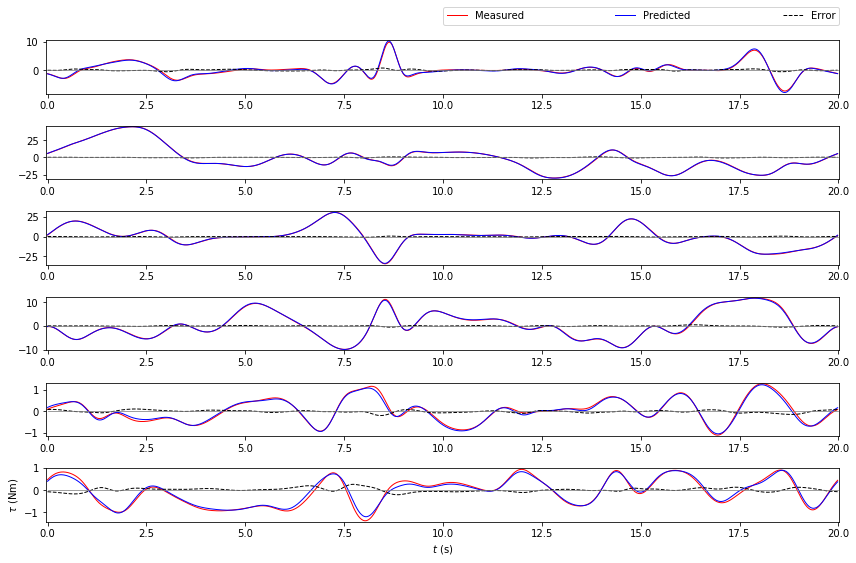

In [311]:
from support_funcs.regr_data_proc import  plot_meas_pred_tau

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]

proc = numpy.load(tmpfolder + 'procdata/' + indentification_traj + '_proc.npz')
t = proc['t']
tau = proc['tau']

tau_p = np.zeros(tau.shape)
tau_ps = W.dot(beta_ols)
for i in range(dof):
    tau_p[:, i] = tau_ps[i::dof].flatten()

base_freq = 0.05    
trajectory_sampling_rate = 50
plot_data_num = int(1 / base_freq * trajectory_sampling_rate)
plot_meas_pred_tau(t[:plot_data_num], tau[:plot_data_num, :],
                   tau_p[:plot_data_num, :])

## Weighted Least Square (WLS)

In [312]:
proc = numpy.load(tmpfolder + 'procdata/' + indentification_traj + '_proc.npz')
t = proc['t']
tau = proc['tau']

weight = np.max(tau, axis=0) - np.min(tau, axis=0)
print("weight: ")
print(weight)


# repeat the weight to generate a large vecoter for all the data
weights = 1.0/np.tile(weight, W.shape[0]/weight.shape[0])

weight: 
[17.19337918 73.86468241 65.35492034 21.71727868  2.36473833  2.32013906]


In [313]:
weights[0:6]

array([0.05816192, 0.01353827, 0.01530107, 0.04604628, 0.42287977,
       0.43100865])

In [314]:
W_wls = np.multiply(W, np.asmatrix(weights).transpose())
omega_wls = np.multiply(omega.T, weights).T
Q1_wls,R1_wls = numpy.linalg.qr(W_wls)
rho1_wls = Q1_wls.T*omega_wls

In [315]:
%time beta_wls = (R1_wls.T * R1_wls).I * R1_wls.T * rho1_wls

CPU times: user 2.61 ms, sys: 64 µs, total: 2.68 ms
Wall time: 1.51 ms


In [316]:
numpy.savetxt(tmpfolder + 'solutions/' + indentification_traj + '_beta_wls.dat', beta_wls)

In [317]:
rho2_norm_sqr_wls = numpy.linalg.norm(omega_wls - W_wls * beta_wls)**2

### plot measured and predicted torque

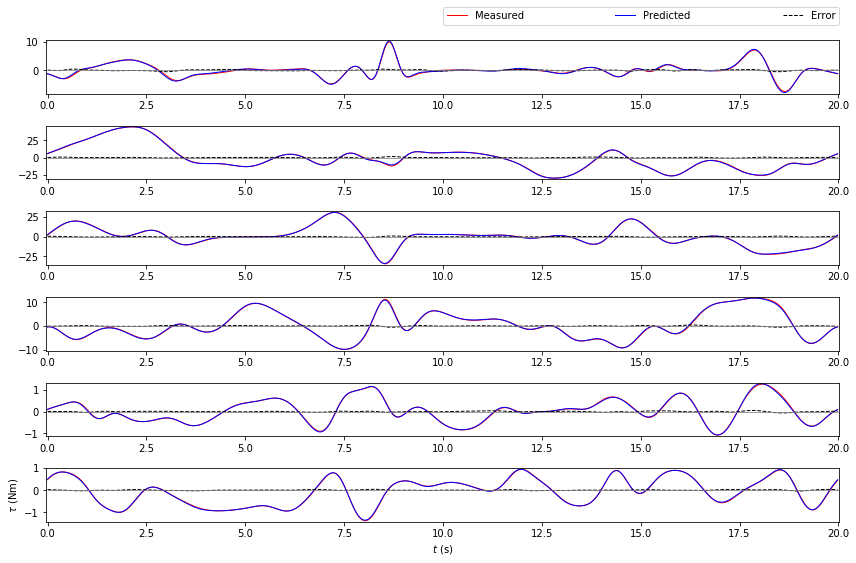

In [318]:
from support_funcs.regr_data_proc import  plot_meas_pred_tau

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]

proc = numpy.load(tmpfolder + 'procdata/' + indentification_traj + '_proc.npz')
t = proc['t']
tau = proc['tau']

tau_p = np.zeros(tau.shape)
tau_ps = W.dot(beta_wls)
for i in range(dof):
    tau_p[:, i] = tau_ps[i::dof].flatten()

base_freq = 0.05    
trajectory_sampling_rate = 50
plot_data_num = int(1 / base_freq * trajectory_sampling_rate)
plot_meas_pred_tau(t[:plot_data_num], tau[:plot_data_num, :],
                   tau_p[:plot_data_num, :])

### Base Parameter Feasibility Test (BPFT) of OLS Solution

In [319]:
dict_subs = dict(zip(beta_symbs, beta_wls.flatten().tolist()[0]))
lmis_ols_bpft = [ lmi_sdp.LMI_PD(mrepl(lmi.canonical().gts, dict_subs)) for lmi in DB_LMIs ]

In [320]:
lmis_ols_bpft[0]

Matrix([
[L_1xx, L_1xy,                                                                                                                                    L_1xz,     0,  l_1z, -l_1y],
[L_1xy, L_1yy,                                                                                                                                    L_1yz, -l_1z,     0,  l_1x],
[L_1xz, L_1yz, -L_2yy + 0.04992*l_2z - 0.0006230016*m_2 - 0.0162755137*m_3 - 0.0162755137*m_4 - 0.0162755137*m_5 - 0.0162755137*m_6 + 0.140497061001665,  l_1y, -l_1x,     0],
[    0, -l_1z,                                                                                                                                     l_1y,   m_1,     0,     0],
[ l_1z,     0,                                                                                                                                    -l_1x,     0,   m_1,     0],
[-l_1y,  l_1x,                                                                                                      

In [321]:
variables_ols_bpft = list(delta_d)
objf_ols_bpft = 0  # no objective function - "find" problem

Testing with all solvers

**Just one of the following calls is sufficient to show feasibility/infeasibility**

In [322]:
sol = sdpa_file(objf_ols_bpft, lmis_ols_bpft, variables_ols_bpft) # One can solve the output file at http://www.neos-server.org/neos/solvers/sdp:DSDP/SDPA.html for example.

SDPA file saved at: tmp/sdpa_dat/sdpa_input.dat-s


In [323]:
sol = dsdp5(objf_ols_bpft, lmis_ols_bpft, variables_ols_bpft)

sdp.dat-s -save dsdp5.out -gaptol 1e-07 

Variables 24 
Matrix Blocks: 6, Total Number of Constraints: 36 
Nonzeros in Constraints: 178

Read Data File into Buffer:      1.502e-03 seconds
DSDP Set Data:                   7.379e-04 seconds
DSDP Process Data:               1.011e-02 seconds

Data Norms: C: 6.84e+00, A: 9.81e+00, b: 0.00e+00
Scale C: 1.00e+00

Potential Parameter: 5.00
Reapply Schur matrix: 10

Iter   PP Objective      DD Objective    PInfeas   DInfeas     Nu     StepLength   Pnrm
---------------------------------------------------------------------------------------
0     1.00000000e+10   -1.53548696e+12   1.0e+00   1.5e+04   1.5e+12  0.00  0.00   0.00 
10    5.36966506e+11   -6.30200053e+09   3.7e+03   6.3e+01   2.2e+08  1.00  1.00  23.18 
20   -4.04545367e+06   -4.04618287e+06   7.5e+02   4.0e-02   1.3e-01  1.00  1.00  36.97 
26   -4.04618023e+06   -4.04618025e+06   3.9e+02   4.0e-02   3.3e-05  1.00  0.04  15.93 
DSDP Converged. 
DSDP Primal Unbounded, Dual Infeasible


In [324]:
sol = sdpa(objf_ols_bpft, lmis_ols_bpft, variables_ols_bpft)

SDPA (Version 7.3.9) start at [Wed Nov  7 16:26:42 2018]
set   is STABLE_BUT_SLOW
data  is tmp/sdpa_dat/sdp.dat-s : sparse
out   is tmp/sdpa_dat/sdpa.out
NumThreads  is set as 1
Schur computation : DENSE 
Entering DMUMPS driver with JOB, N, NZ =  -2           0              0
   mu      thetaP  thetaD  objP      objD      alphaP  alphaD  beta 
 0 1.0e+08 1.0e+00 1.0e+00 -0.00e+00 -2.01e+04 6.3e-01 6.7e-01 3.00e-01
 1 5.0e+07 3.7e-01 3.3e-01 -0.00e+00 -1.08e+05 6.7e-01 7.2e-01 3.00e-01
 2 2.2e+07 1.2e-01 9.2e-02 -0.00e+00 -1.60e+05 6.5e-01 6.8e-01 3.00e-01
 3 1.1e+07 4.3e-02 2.9e-02 -0.00e+00 -2.03e+05 6.6e-01 7.2e-01 3.00e-01
 4 5.0e+06 1.5e-02 8.1e-03 -0.00e+00 -2.67e+05 7.5e-01 7.8e-01 3.00e-01
 5 1.8e+06 3.7e-03 1.8e-03 -0.00e+00 -3.70e+05 7.9e-01 7.8e-01 3.00e-01
 6 5.6e+05 7.7e-04 3.9e-04 -0.00e+00 -5.13e+05 7.8e-01 8.0e-01 3.00e-01
 7 1.9e+05 1.7e-04 7.8e-05 -0.00e+00 -6.76e+05 7.4e-01 8.0e-01 3.00e-01
 8 7.5e+04 4.4e-05 1.6e-05 -0.00e+00 -6.68e+05 6.7e-01 8.0e-01 3.00e-01
 9 3.3

In [135]:
sol = csdp(objf_ols_bpft, lmis_ols_bpft, variables_ols_bpft)

This is a pure dual feasibility problem.
Iter:  0 Ap: 0.00e+00 Pobj: -3.8296290e+03 Ad: 0.00e+00 Dobj:  0.0000000e+00 
Iter:  1 Ap: 8.96e-01 Pobj: -5.2770492e+03 Ad: 8.16e-01 Dobj:  0.0000000e+00 
Iter:  2 Ap: 6.30e-01 Pobj: -4.7758728e+03 Ad: 6.04e-01 Dobj:  0.0000000e+00 
Iter:  3 Ap: 5.03e-01 Pobj: -4.1867025e+03 Ad: 8.53e-01 Dobj:  0.0000000e+00 
Iter:  4 Ap: 8.74e-01 Pobj: -1.5539887e+03 Ad: 4.75e-01 Dobj:  0.0000000e+00 
Iter:  5 Ap: 3.90e-01 Pobj:  2.5868012e+00 Ad: 2.09e-01 Dobj:  0.0000000e+00 
Iter:  6 Ap: 8.83e-02 Pobj:  2.6946911e+03 Ad: 1.83e-01 Dobj:  0.0000000e+00 
Iter:  7 Ap: 3.62e-03 Pobj:  8.0058280e+03 Ad: 1.06e-02 Dobj:  0.0000000e+00 
Iter:  8 Ap: 1.61e-02 Pobj:  6.0199514e+04 Ad: 1.30e-02 Dobj:  0.0000000e+00 
Iter:  9 Ap: 6.67e-03 Pobj:  2.9195543e+05 Ad: 8.91e-03 Dobj:  0.0000000e+00 
Iter: 10 Ap: 4.86e-03 Pobj:  1.5474164e+06 Ad: 7.36e-03 Dobj:  0.0000000e+00 
Iter: 11 Ap: 7.92e-04 Pobj:  3.2963353e+06 Ad: 1.12e-02 Dobj:  0.0000000e+00 
Iter: 12 Ap: 1.26e-03 P

In [144]:
sol = cvxopt_conelp(objf_ols_bpft, lmis_ols_bpft, variables_ols_bpft)

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -1.2158e+01  1e+02  2e+00  7e+00  1e+00
 1:  0.0000e+00 -2.3016e-01  3e+00  2e-01  6e-01  8e-01
 2:  0.0000e+00 -9.6107e-02  1e+00  6e-02  2e-01  3e-01
 3:  0.0000e+00  2.0962e-01  4e+01  3e-01  1e+00  2e+00
 4:  0.0000e+00  7.3312e-01  3e+01  1e-01  5e-01  2e+00
 5:  0.0000e+00  4.7892e-01  2e+01  7e-02  3e-01  1e+00
 6:  0.0000e+00  3.4714e+00  1e+02  6e-02  2e-01  4e+00
 7:  0.0000e+00  1.1664e+01  3e+02  6e-02  2e-01  1e+01
 8:  0.0000e+00  1.0313e+02  2e+03  5e-02  2e-01  1e+02
 9:  0.0000e+00  1.7208e+03  4e+04  5e-02  2e-01  2e+03
10:  0.0000e+00  1.3030e+04  3e+05  5e-02  2e-01  1e+04
11:  0.0000e+00  9.8979e+04  2e+06  5e-02  2e-01  1e+05
12:  0.0000e+00  3.6891e+05  8e+06  5e-02  2e-01  4e+05
13:  0.0000e+00  9.4734e+05  2e+07  5e-02  2e-01  9e+05
14:  0.0000e+00  1.0511e+06  3e+07  5e-02  2e-01  1e+06
15:  0.0000e+00  1.0467e+07  3e+08  5e-02  2e-01  1e+07
Certificate of primal infeasibility found.
primal 

## Base Parameter Feasibility Correction (BPFC)     ($\beta^\prime$)

In [325]:
u = sympy.Symbol('u')
U_beta = BlockMatrix([[Matrix([u]),            (beta_wls - beta_symbs).T],
                 [beta_wls - beta_symbs,                 I(n_beta)]])
U_beta = U_beta.as_explicit()

In [326]:
lmis_ols_bpfc = [LMI(U_beta)] + DB_LMIs_marg

In [327]:
lmis_ols_bpfc[1]

Matrix([
[L_1xx, L_1xy,                                                                                                                        L_1xz,     0,  l_1z, -l_1y],
[L_1xy, L_1yy,                                                                                                                        L_1yz, -l_1z,     0,  l_1x],
[L_1xz, L_1yz, -L_2yy + beta1 + 0.04992*l_2z - 0.0006230016*m_2 - 0.0162755137*m_3 - 0.0162755137*m_4 - 0.0162755137*m_5 - 0.0162755137*m_6,  l_1y, -l_1x,     0],
[    0, -l_1z,                                                                                                                         l_1y,   m_1,     0,     0],
[ l_1z,     0,                                                                                                                        -l_1x,     0,   m_1,     0],
[-l_1y,  l_1x,                                                                                                                            0,     0,     0,   m_1]]) >= Matrix([


In [328]:
variables_ols_bpfc = [u] + list(beta_symbs) + list(delta_d)

In [329]:
objf_ols_bpfc = u

In [330]:
sol_ols_bpfc = solve_sdp(objf_ols_bpfc, lmis_ols_bpfc, variables_ols_bpfc)

sdp.dat-s -save dsdp5.out -gaptol 1e-07 

Variables 61 
Matrix Blocks: 7, Total Number of Constraints: 73 
Nonzeros in Constraints: 323

Read Data File into Buffer:      4.508e-04 seconds
DSDP Set Data:                   9.608e-05 seconds
DSDP Process Data:               6.211e-04 seconds

Data Norms: C: 7.93e+00, A: 1.58e+01, b: 1.00e+00
Scale C: 1.00e+00

Potential Parameter: 5.00
Reapply Schur matrix: 4

Iter   PP Objective      DD Objective    PInfeas   DInfeas     Nu     StepLength   Pnrm
---------------------------------------------------------------------------------------
0     1.00000000e+10   -4.36019764e+12   2.0e+00   4.4e+04   4.4e+12  0.00  0.00   0.00 
10    6.50336765e+13   -1.73609686e+13   3.7e+05   1.7e+05   2.0e+11  1.00  1.00   5.93 
20    9.99414640e+10   -2.06613201e+10   9.5e+02   2.1e+02   3.7e+08  1.00  1.00   1.20 
30    6.60964778e+08   -4.15426281e+07   4.7e+00   3.3e-01   2.3e+06  1.00  1.00   0.89 
40    1.37939688e+06   -1.06008009e+05   3.0e-03   0.0e+0

In [331]:
u_prime = sol_ols_bpfc[0,0]
beta_prime = sol_ols_bpfc[1:1+n_beta]
delta_d_prime = sol_ols_bpfc[1+n_beta:]

In [332]:
u_prime

0.011603288711368941

### plot measured and predicted torque

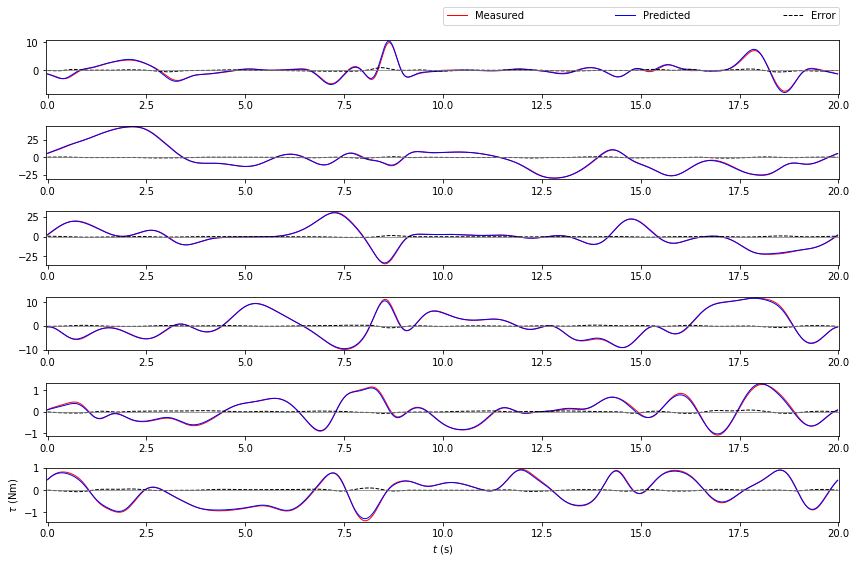

In [333]:
# from support_funcs.regr_data_proc import  plot_meas_pred_tau

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]

proc = numpy.load(tmpfolder + 'procdata/' + indentification_traj + '_proc.npz')
t = proc['t']
tau = proc['tau']

tau_p = np.zeros(tau.shape)
tau_ps = W.dot(beta_prime)
for i in range(dof):
    tau_p[:, i] = tau_ps[i::dof].flatten()

base_freq = 0.05    
trajectory_sampling_rate = 50
plot_data_num = int(1 / base_freq * trajectory_sampling_rate)
plot_meas_pred_tau(t[:plot_data_num], tau[:plot_data_num, :],
                   tau_p[:plot_data_num, :])

### Solution Double Check

In [334]:
dict_subs = dict(zip(beta_symbs, beta_prime.flatten().tolist()[0]))
dict_subs.update(dict(zip(delta_d, delta_d_prime.flatten().tolist()[0])))

test = 'ok'
for i, DBi in enumerate(DB_blocks):
        m = numpy.matrix(mrepl(DBi, dict_subs)).astype(float)
        for v in numpy.linalg.eigvals( m ):
            if v <= 0.0:
                print i, v
                test = 'fail'
print(test)

ok


In [335]:
numpy.savetxt(tmpfolder + 'solutions/' + indentification_traj + '_beta_prime.dat', beta_prime)

## Feasible Base Parameter Estimation with Weight Least Squares (FBPE-WLS)     ($\beta^\star$)

In [336]:
u = sympy.Symbol('u')
U_rho = BlockMatrix([[Matrix([u - rho2_norm_sqr_wls]), (rho1_wls - R1_wls*beta_symbs).T],
                     [rho1_wls - R1_wls*beta_symbs,                       I(n_beta)]])
U_rho = U_rho.as_explicit()

In [337]:
lmis_fbpe_ols = [LMI(U_rho)] + DB_LMIs_marg

In [338]:
variables_fbpe_ols = [u] + list(beta_symbs) + list(delta_d)

In [339]:
objf_fbpe_ols = u

In [340]:
sol_fbpe_ols = solve_sdp(objf_fbpe_ols, lmis_fbpe_ols, variables_fbpe_ols)

sdp.dat-s -save dsdp5.out -gaptol 1e-07 

Variables 61 
Matrix Blocks: 7, Total Number of Constraints: 73 
Nonzeros in Constraints: 954

Read Data File into Buffer:      1.388e-03 seconds
DSDP Set Data:                   1.090e-04 seconds
DSDP Process Data:               2.001e-03 seconds

Data Norms: C: 3.92e+01, A: 5.16e+02, b: 1.00e+00
Scale C: 1.00e+00

Potential Parameter: 5.00
Reapply Schur matrix: 4

Iter   PP Objective      DD Objective    PInfeas   DInfeas     Nu     StepLength   Pnrm
---------------------------------------------------------------------------------------
0     1.00000000e+10   -6.37284558e+14   2.0e+00   6.4e+06   6.4e+14  0.00  0.00   0.00 
10    5.54566616e+11   -9.07898501e+10   4.3e+03   9.1e+02   1.7e+09  1.00  1.00   1.33 
20    9.66145900e+08   -9.41572119e+07   7.6e+00   8.5e-01   3.3e+06  1.00  1.00   1.15 
30    9.77961007e+04   -1.23670366e+03   2.1e-04   0.0e+00   3.6e+01  1.00  1.00   9.93 
40    1.27252654e+02   -6.31028056e+00   2.7e-07   0.0e+0

In [341]:
u_star = sol_fbpe_ols[0,0]
beta_star = numpy.matrix(sol_fbpe_ols[1:1+n_beta])
delta_d_star = numpy.matrix(sol_fbpe_ols[1+n_beta:])

In [342]:
u_star

1.0746168879646698

### plot measured and predicted torque

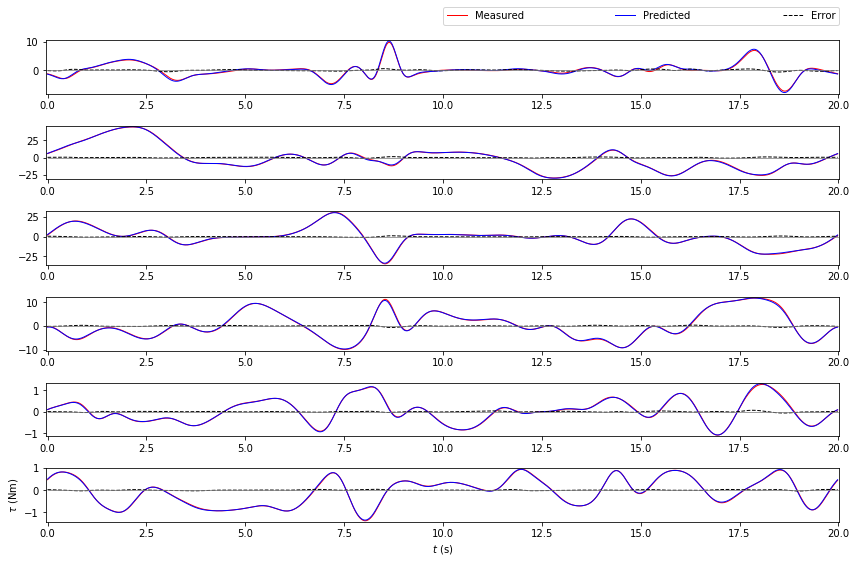

In [343]:
# from support_funcs.regr_data_proc import  plot_meas_pred_tau

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]

proc = numpy.load(tmpfolder + 'procdata/' + indentification_traj + '_proc.npz')
t = proc['t']
tau = proc['tau']

tau_p = np.zeros(tau.shape)
tau_ps = W.dot(beta_star)
for i in range(dof):
    tau_p[:, i] = tau_ps[i::dof].flatten()

base_freq = 0.05    
trajectory_sampling_rate = 50
plot_data_num = int(1 / base_freq * trajectory_sampling_rate)
plot_meas_pred_tau(t[:plot_data_num], tau[:plot_data_num, :],
                   tau_p[:plot_data_num, :])

### Solution Double Check

In [344]:
dict_subs = dict(zip(beta_symbs, beta_star.flatten().tolist()[0]))
dict_subs.update(dict(zip(delta_d, delta_d_star.flatten().tolist()[0])))

test = 'ok'
for DBi in DB_blocks:
        m = numpy.matrix(mrepl(DBi, dict_subs)).astype(float)
        for v in numpy.linalg.eigvals( m ):
            if v <= 0.0:
                print(v)
                test = 'fail'
print(test)

ok


In [345]:
numpy.savetxt(tmpfolder + 'solutions/' + indentification_traj + '_beta_star.dat', beta_star)

## Additional Constraints on Centers-of-Mass    ($\beta^{\star e}$)

In [441]:
link_cuboid_hulls = [
[[ -0.010 , +0.010 ],[ -0.010 , +0.010 ],[ -0.10 , +0.10 ]],
[[ -0.10 , +0.10 ],[ -0.010 , +0.010 ],[ -0.010 , +0.010 ]],
[[ -0.20 , +0.30 ],[ -0.020 , +0.020 ],[ -0.030 , +0.030 ]],
[[ -0.20 , +0.30 ],[ -0.010 , +0.010 ],[ -0.030 , +0.030 ]],
[[ -0.01 , +0.01 ],[ -0.01 , +0.01 ],[ -0.01 , +0.01 ]],
[[ -0.10 , +0.10 ],[ -0.010 , +0.010 ],[ -0.050 , +0.050 ]],
]

link_mass = [
[ 1.50 , 2.50 ],
[ 3.50 , 4.50 ],
[ 4.50 , 5.50 ],
[ 3.50 , 4.50 ],
[ 0.0001 , 0.01 ],
[ 1.50 , 2.50 ]
]

robotmaxmass = 18.0

#### LMI Matrix Definition

In [442]:
D_add_blocks = []
for i in range(rbt.dof):
    l = rbt.rbtdef.l[i]
    m = rbt.rbtdef.m[i]
    link_cuboid_hull = link_cuboid_hulls[i]
    D_add_blocks.append(Matrix([[m - link_mass[i][0]]]))
    D_add_blocks.append(Matrix([[link_mass[i][1] - m]]))
    for j in range(3):
        D_add_blocks.append( Matrix( [[  l[j] - m*link_cuboid_hull[j][0] ]] ) )
        D_add_blocks.append( Matrix( [[ -l[j] + m*link_cuboid_hull[j][1] ]] ) )

D_add_blocks.append(Matrix([robotmaxmass - sum(rbt.rbtdef.m)]))

#### Variable Change and LMI Definition

In [443]:
DB_add_blocks = [ mrepl(Di, varchange_dict) for Di in D_add_blocks ]

In [444]:
DB_add_LMIs = list(map(LMI_PD, DB_add_blocks))

In [445]:
DB_add_LMIs_marg = list(map(lambda lm: LMI(lm, epsilon_safemargin*eye(lm.shape[0])) , DB_add_blocks))

In [446]:
DB_add_LMIs_marg[15]

Matrix([[-l_2z + 0.01*m_2]]) >= Matrix([[1.0e-6]])

In [447]:
DB_add_LMIs_marg[-1]

Matrix([[-m_1 - m_2 - m_3 - m_4 - m_5 - m_6 + 18.0]]) >= Matrix([[1.0e-6]])

### Testing $\beta^\star$ solution on new constraints

In [448]:
dict_subs = dict(zip(beta_symbs, beta_star.flatten().tolist()[0]))
lmis_star_bpft_add = [ lmi_sdp.LMI_PD(mrepl(lmi.canonical().gts, dict_subs)) for lmi in DB_add_LMIs_marg ]
variables_star_bpft_add = list(delta_d)
objf_star_bpft_add = delta_d[0]

In [449]:
sol_star_bpft_add = solve_sdp(objf_star_bpft_add, lmis_star_bpft_add, variables_star_bpft_add)

sdp.dat-s -save dsdp5.out -gaptol 1e-07 

Variables 24 
Matrix Blocks: 49, Total Number of Constraints: 49 
Nonzeros in Constraints: 153

Read Data File into Buffer:      3.979e-04 seconds
DSDP Set Data:                   2.511e-04 seconds
DSDP Process Data:               3.300e-04 seconds

Data Norms: C: 2.19e+01, A: 6.59e+00, b: 1.00e+00
Scale C: 3.05e-01

Potential Parameter: 5.00
Reapply Schur matrix: 10

Iter   PP Objective      DD Objective    PInfeas   DInfeas     Nu     StepLength   Pnrm
---------------------------------------------------------------------------------------
0     1.00000000e+10   -1.39205353e+12   2.0e+00   1.4e+04   1.4e+12  0.00  0.00   0.00 
10    9.98689235e+06    9.98270458e+06   1.0e+08   1.7e-04   2.7e+00  1.00  1.00  51.99 
16    9.98281094e+06    9.98281090e+06   1.0e+08   1.7e-04   9.8e-05  1.00  0.03  33.36 
DSDP Converged. 
DSDP Primal Unbounded, Dual Infeasible

P Objective  :  -1.71890788e+04 
DSDP Solution:   1.00000000e+07 

DSDP Solve Time:    

### Finding new solution

In [450]:
lmis_fbpe_ols_add = [LMI(U_rho)] + DB_LMIs_marg + DB_add_LMIs_marg

In [451]:
variables_fbpe_ols_add = [u] + list(beta_symbs) + list(delta_d)

In [452]:
objf_fbpe_ols_add = u

In [453]:
sol_fbpe_ols_add = solve_sdp(objf_fbpe_ols_add, lmis_fbpe_ols_add, variables_fbpe_ols_add)

sdp.dat-s -save dsdp5.out -gaptol 1e-07 

Variables 61 
Matrix Blocks: 56, Total Number of Constraints: 122 
Nonzeros in Constraints: 1127

Read Data File into Buffer:      1.612e-03 seconds
DSDP Set Data:                   1.650e-04 seconds
DSDP Process Data:               2.089e-03 seconds

Data Norms: C: 4.47e+01, A: 5.16e+02, b: 1.00e+00
Scale C: 1.00e+00

Potential Parameter: 5.00
Reapply Schur matrix: 4

Iter   PP Objective      DD Objective    PInfeas   DInfeas     Nu     StepLength   Pnrm
---------------------------------------------------------------------------------------
0     1.00000000e+10   -6.16891971e+14   2.0e+00   6.2e+06   6.2e+14  0.00  0.00   0.00 
10    2.30831024e+10   -8.54958790e+09   1.3e+02   8.5e+01   7.6e+07  1.00  1.00   1.59 
20    2.25462894e+07   -7.28328791e+05   1.8e-02   3.9e-03   3.5e+04  0.44  1.00   0.32 
30    3.42282009e+04   -7.13046740e+02   2.5e-05   0.0e+00   6.9e+01  1.00  1.00   0.69 
40    3.68291915e+01   -1.77643581e+00   2.8e-08   0.0

In [454]:
u_starextra = sol_fbpe_ols_add[0,0]
beta_starextra = numpy.matrix(sol_fbpe_ols_add[1:1+n_beta])
delta_d_starextra = numpy.matrix(sol_fbpe_ols_add[1+n_beta:])

In [455]:
u_starextra

1.2229956566168503

### plot measured and predicted torque

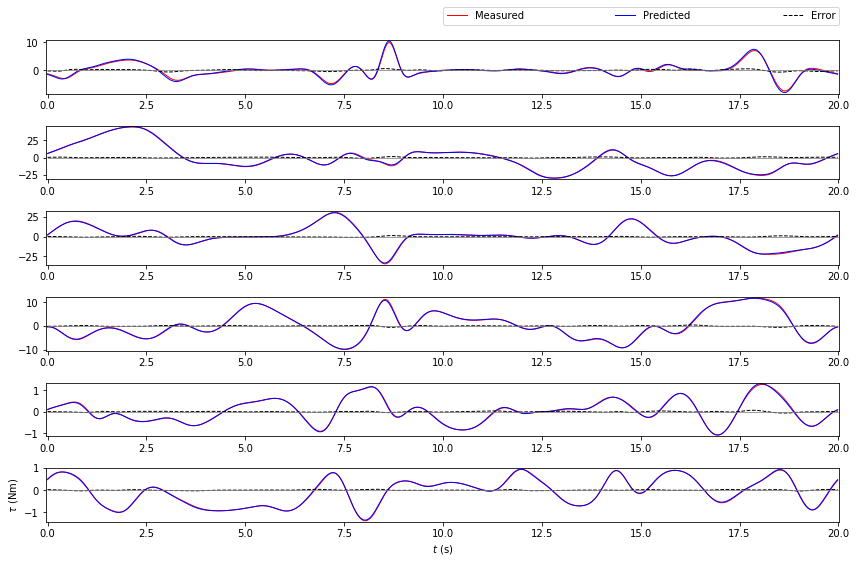

In [456]:
# from support_funcs.regr_data_proc import  plot_meas_pred_tau

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]

traj = 'traj1'
proc = numpy.load(tmpfolder + 'procdata/' + traj + '_proc.npz')  #indentification_
t = proc['t']
tau = proc['tau']

regr_mats = numpy.load(tmpfolder + 'procdata/' + traj + '_regr.npz')
W1 = numpy.matrix(regr_mats['W'])

tau_p = np.zeros(tau.shape)
tau_ps = W1.dot(beta_starextra)
for i in range(dof):
    tau_p[:, i] = tau_ps[i::dof].flatten()

base_freq = 0.05    
trajectory_sampling_rate = 50
plot_data_num = int(1 / base_freq * trajectory_sampling_rate)
plot_meas_pred_tau(t[:plot_data_num], tau[:plot_data_num, :],
                   tau_p[:plot_data_num, :])

### Solution Double Check

In [457]:
dict_subs = dict(zip(beta_symbs, beta_starextra.flatten().tolist()[0]))
dict_subs.update(dict(zip(delta_d, delta_d_starextra.flatten().tolist()[0])))

test = 'ok'
for DBi in (DB_blocks + DB_add_blocks):
        m = numpy.matrix(mrepl(DBi, dict_subs)).astype(float)
        for v in numpy.linalg.eigvals( m ):
            if v <= 0.0: test = 'fail'
print(test)

ok


In [458]:
numpy.savetxt(tmpfolder + 'solutions/' + indentification_traj + '_beta_starextra.dat', beta_starextra)

### Inertia Matrix Definiteness Tests

In [367]:
def test_mass_matrix_psd(beta_solution):
    K = rbt.dyn.Pb.T + rbt.dyn.Kd * rbt.dyn.Pd.T
    A = numpy.matrix(K).astype(float)
    b = numpy.matrix(beta_solution).astype(float)
    x = numpy.linalg.pinv(A) * b
    d_test = x
    
    M_func_def = sympybotics.robotcodegen.robot_code_to_func( 'python', rbt.M_code, 'M', 'M_func', rbt.rbtdef)
    exec(M_func_def, globals())
    global sin, cos
    from math import sin, cos
    
    ntests = 10000
    
    ok = 0
    nok = 0
    for i in range(ntests):
        q_test = numpy.random.rand(rbt.dof)
        M_out = M_func( numpy.array(d_test).flatten().tolist(), q_test)
        M = numpy.matrix(M_out).reshape((rbt.dof,rbt.dof))
        try:
            c = numpy.linalg.cholesky(M)
        except:
            nok += 1
            continue
        ok += 1
        
    print 'ok     %8i  %3i%%'%(ok, 100.0*ok/ntests) 
    print 'not ok %8i  %3i%%'%(nok, 100.0*nok/ntests)
    if nok > 0 :
        print('\nNot PSD -> Not feasible!')
    else:
        print('\nSeems feasible.')

In [368]:
beta_ols = numpy.matrix(numpy.loadtxt(tmpfolder + 'solutions/traj1_beta_ols.dat')).T
test_mass_matrix_psd(beta_ols)

ok         7835   78%
not ok     2165   21%

Not PSD -> Not feasible!


In [369]:
beta_wls = numpy.matrix(numpy.loadtxt(tmpfolder + 'solutions/traj1_beta_wls.dat')).T
test_mass_matrix_psd(beta_wls)

ok         4833   48%
not ok     5167   51%

Not PSD -> Not feasible!


In [370]:
beta_prime = numpy.matrix(numpy.loadtxt(tmpfolder + 'solutions/traj1_beta_prime.dat')).T
test_mass_matrix_psd(beta_prime)

ok        10000  100%
not ok        0    0%

Seems feasible.


In [371]:
beta_star = numpy.matrix(numpy.loadtxt(tmpfolder + 'solutions/traj1_beta_star.dat')).T
test_mass_matrix_psd(beta_star)

ok        10000  100%
not ok        0    0%

Seems feasible.


In [372]:
beta_starextra = numpy.matrix(numpy.loadtxt(tmpfolder + 'solutions/traj1_beta_starextra.dat')).T
test_mass_matrix_psd(beta_starextra)

ok        10000  100%
not ok        0    0%

Seems feasible.


5 - Regression Model Validation
====================================================

In [459]:
import numpy as np
import sympybotics
import pickle

from collections import OrderedDict
from support_funcs.utils import ListTable

In [460]:
with open(tmpfolder +  'robotmodels/ljhn_leftleg_model.pkl', 'rb' ) as file:
          rbt = pickle.load( file )

In [461]:
def analyse(W, omega, R1, beta):
    from numpy import matrix, mean
    from numpy.linalg import cond, norm
    
    p = dict()
    
    n = W.shape[0]
    
    omega_norm = norm(omega)
    omega_mean = mean(omega)
    
    p['err'] = norm(omega - W * beta)
    p['merr'] = p['err'] / n
    
    p['se'] = p['err']**2
    p['mse'] = p['se']/(n-W.shape[1])
    p['rmse'] = p['mse']**0.5
    
    C = p['mse'] * (R1.T * R1).I
    p['sd'] = np.sqrt(C.diagonal()).T
    p['sd%'] = 100. * p['sd'] / np.abs(beta)
    
    p['relerr'] = p['err']/ omega_norm
    p['relerr%'] = p['relerr']*100.
    
    p['1-r2'] = p['err']**2 / norm(omega - omega_mean)**2
    p['r2'] = 1 - p['1-r2']

    return p
    

In [462]:
# trajs = OrderedDict([('id', 'traj1'),
#                      ('vA', 'traj2'),
#                      ('vB', 'traj3'),
#                      ('vC', 'traj4')])

trajs = OrderedDict([('id', 'traj1'),
                     ('vA', 'traj2'),
                     ('vB', 'traj3')
#                     , ('vC', 'traj4')
                    ])

betas = OrderedDict([('beta_ols', 'B^'),
                     ('beta_wls', 'B~'),
                     ('beta_prime', 'B\''),
                     ('beta_star', 'B*'),
                     ('beta_starextra', 'B*e')])

In [463]:
solutions_beta = {betaname:np.matrix(np.loadtxt(tmpfolder + 'solutions/%s_%s.dat'%(trajs['id'], betaname))).T for betaname in betas}

In [464]:
analysis = dict()

for traj in trajs:
    from numpy.linalg import cond
    
    print(traj)
    
    analysis[traj] = dict()
    
    regr_mats = np.load(tmpfolder + 'procdata/' + trajs[traj] + '_regr.npz')
    W = np.matrix(regr_mats['W'])
    omega = np.matrix(regr_mats['omega'])
    R1 = np.matrix(regr_mats['R1'])
    
    analysis[traj]['cond'] = cond(W)
    
    analysis[traj]['betas'] = dict()
    
    for betaname in betas:
        beta = solutions_beta[betaname]
        analysis[traj]['betas'][betaname] = analyse(W, omega, R1, beta)
    
    del W, omega, R1

id
vA
vB


In [465]:
prop = lambda x: x['relerr%']
form = '%.2f'

table = ListTable()
table.append([''] + ['cond'] + betas.values())
for (traj, trajname) in zip(trajs, ['identification', 'validation A', 'validation B', 'validation C']):
    row = [traj] + ['%.0f'%analysis[traj]['cond']] + [ form%prop(analysis[traj]['betas'][b]) for b in betas]
    table.append(row)
table

,cond,B^,B~,B',B*,B*e
id,27,2.38,2.71,3.03,2.95,3.19
vA,31,3.92,3.25,3.45,3.47,3.59
vB,24,4.30,4.28,4.29,4.35,4.53


In [466]:
import yaml, sympy
with open(datafolder + 'robotparams/ljhn_leftleg_cad.yml', 'r') as f:
    ljhn_leftleg_cad = yaml.load(f)
delta_cad = sympy.Matrix([ljhn_leftleg_cad.get(str(d), d) for d in rbt.dyn.dynparms])
beta_cad = (rbt.dyn.Pb.T + rbt.dyn.Kd * rbt.dyn.Pd.T) * delta_cad

### plot measured and predicted torque

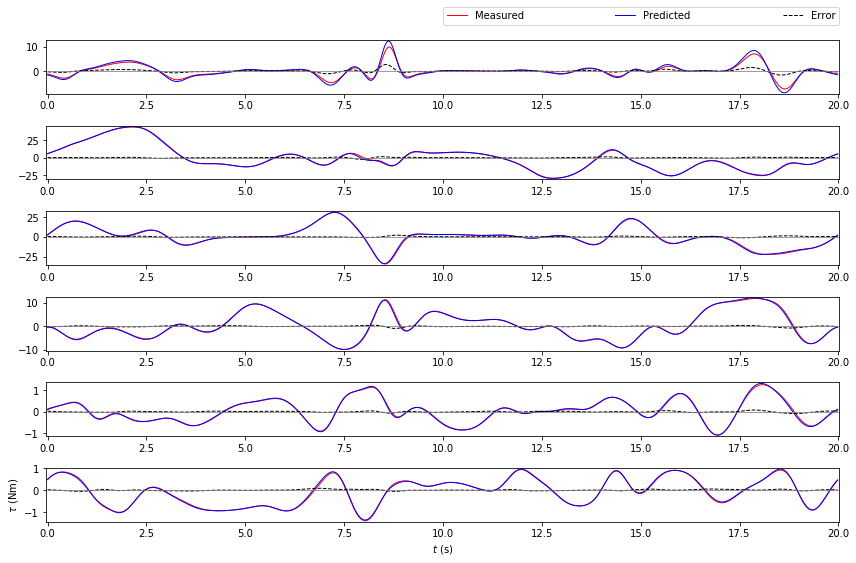

In [384]:
# from support_funcs.regr_data_proc import  plot_meas_pred_tau

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]

traj = 'traj1'
proc = numpy.load(tmpfolder + 'procdata/' + traj + '_proc.npz')
t = proc['t']
tau = proc['tau']

regr_mats = numpy.load(tmpfolder + 'procdata/' + traj + '_regr.npz')
W1 = numpy.matrix(regr_mats['W'])

tau_p = np.zeros(tau.shape)
tau_ps = W1.dot(numpy.matrix(beta_cad).astype(float64))
for i in range(dof):
    tau_p[:, i] = tau_ps[i::dof].flatten()

base_freq = 0.05    
trajectory_sampling_rate = 50
plot_data_num = int(1 / base_freq * trajectory_sampling_rate)
plot_meas_pred_tau(t[:plot_data_num], tau[:plot_data_num, :],
                   tau_p[:plot_data_num, :])

### $\beta^{cad}$  Double Check

In [215]:
def  test_lmi_matrix_psd(delta_solution):
    dict_subs = dict(zip(delta, delta_solution))

    test = 'ok'
    for Di in D_blocks:
            m = numpy.matrix(mrepl(Di, dict_subs)).astype(float)
            for v in numpy.linalg.eigvals( m ):
                if v <= 0.0:
                    print(v)
                    test = 'fail'
    print(test)

In [216]:
test_lmi_matrix_psd(delta_cad)

ok


In [217]:
test_mass_matrix_psd(beta_cad)

ok        10000  100%
not ok        0    0%

Seems feasible.


In [467]:
form = '%.4g'

import sympy

table = ListTable()
header = ['', 'Bcad', 'B^', '% std dev B^', 'B*ext']
table.append(header)
for i, b in enumerate(rbt.dyn.baseparms.n()):
    if beta_cad[i].is_Number:
        cad_v = sympy.N(beta_cad[i], 4)
    elif beta_cad[i].is_Symbol:
        cad_v = '---'
    else:
        cad_v = sympy.N(beta_cad[i], 4)
    row = ['%.7s ...'%b if len(str(b)) > 137 else str(b), cad_v]
    row += [form%solutions_beta['beta_ols'][i,0], '%.2g'%analysis['id']['betas']['beta_ols']['sd%'][i,0]]
    row += [form%solutions_beta['beta_starextra'][i,0]]
    table.append(row)
table

,Bcad,B^,% std dev B^,B*ext
L_1zz + L_2yy - 0.04992*l_2z + 0.0006230016*m_2 + 0.0162755137*m_3 + 0.0162755137*m_4 + 0.0162755137*m_5 + 0.0162755137*m_6,0.2175,0.1016,6,0.2098
L_2xx - ...,0.8660,0.6894,1.1,0.7671
L_2xy + 0.12511*l_3z - 0.12511*l_4z - 0.12511*l_5z + 0.0095871793*m_3 + 0.0095871793*m_4 + 0.0095871793*m_5 + 0.0095871793*m_6,0.1245,0.09557,3.7,0.12
L_2xz,-0.0005127,-5.949e-05,4.4e+03,-0.004651
L_2yz,3.656e-5,0.03373,8.1,0.03168
L_2zz + ...,1.269,1.12,0.35,1.233
l_2x + 0.12511*m_3 + 0.12511*m_4 + 0.12511*m_5 + 0.12511*m_6,1.626,1.635,0.043,1.638
l_2y - l_3z + l_4z + l_5z - 0.07663*m_3 - 0.07663*m_4 - 0.07663*m_5 - 0.07663*m_6,-1.004,-1.011,0.066,-0.9972
L_3xx - L_3yy - 0.0899340121*m_4 - 0.0899340121*m_5 - 0.0899340121*m_6,-0.6850,-0.4925,0.58,-0.5462
L_3xy,-0.0001393,-0.0786,1.9,-0.06494


## Torque Plot

In [388]:
traj = 'vB'
betaname = 'beta_star'

In [389]:
regr_mats = np.load(tmpfolder + 'procdata/' + trajs[traj] + '_regr.npz')
W = np.matrix(regr_mats['W'])
omega = np.matrix(regr_mats['omega'])

regr_mats = np.load(tmpfolder + 'procdata/' + trajs[traj] + '_proc.npz')
t = regr_mats['t']
tau_proc = np.matrix(regr_mats['tau'])

regr_mats = np.load(tmpfolder + 'procdata/' + trajs[traj] + '_raw.npz')
tau_raw = np.matrix(regr_mats['tau'])

In [390]:
beta_solution = np.matrix(np.loadtxt(tmpfolder + 'solutions/%s_%s.dat'%(trajs['id'], betaname))).T

In [391]:
tau = tau_raw

In [392]:
omega_pred = W * beta_solution
tau_pred = omega_pred.reshape( omega_pred.shape[0]/tau.shape[1], tau.shape[1] )
err_pred = tau - tau_pred

In [393]:
joint = 6
firsts = 2000
s=tau_raw.shape[0]

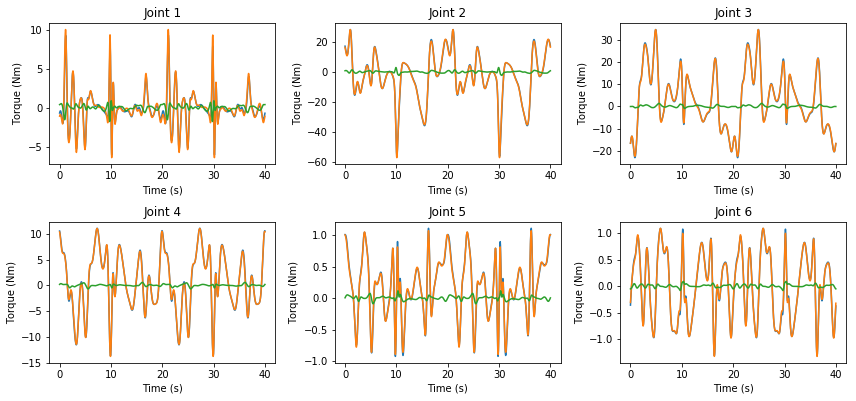

In [394]:
from matplotlib import pyplot as plt
plt.close()

plt.figure(figsize=(12,8))

axes = []
for i in range(tau.shape[1]):
    ax = plt.subplot(3, 3, i+1)
    ax.plot(t[:firsts],tau_raw[:,i][:firsts], label="Measured torque")
    ax.plot(t[:firsts],tau_pred[:,i][:firsts], label="Estimated torque")
    ax.plot(t[:firsts],err_pred[:,i][:firsts], label="Error")
    ax.set_title( "Joint %d"%(i+1) )
    plt.xlabel("Time (s)")
    plt.ylabel("Torque (Nm)")
    axes.append(ax)

plt.tight_layout()

plt.show()

In [468]:
delta_starextra = Pb*beta_starextra + (-Pb*rbt.dyn.Kd+rbt.dyn.Pd)*delta_d_starextra
K = np.matrix(Pb.T+rbt.dyn.Kd*rbt.dyn.Pd.T).astype(float)
delta_starextra_min = np.linalg.pinv(K)*beta_starextra

In [469]:
np.testing.assert_array_almost_equal(K * delta_starextra ,beta_starextra, 10)

In [470]:
for i in range(delta_starextra.shape[0]):
     print 'double ' + repr(rbt.dyn.dynparms[i]) + '    =    ' + repr(delta_starextra[i,0]) + ';'

double L_1xx    =    5773502.69189659;
double L_1xy    =    0;
double L_1xz    =    0;
double L_1yy    =    5773502.69189659;
double L_1yz    =    0;
double L_1zz    =    1.00018330326246e-6;
double l_1x    =    0;
double l_1y    =    0;
double l_1z    =    0;
double m_1    =    1.84641911095404;
double L_2xx    =    0.000993796194111218;
double L_2xy    =    0.000905215469353252;
double L_2xz    =    -0.00465119713512309;
double L_2yy    =    0.0221761876285668;
double L_2yz    =    0.0316761256415542;
double L_2zz    =    0.0851636227062729;
double l_2x    =    0.199774735365134;
double l_2y    =    -0.0449989876537795;
double l_2z    =    0.0449989839516478;
double m_2    =    4.49999891648078;
double L_3xx    =    0.114704173137468;
double L_3xy    =    -0.0649421496268148;
double L_3xz    =    -0.0133402687602906;
double L_3yy    =    0.121969108152042;
double L_3yz    =    -0.00113743565943898;
double L_3zz    =    0.0829682861203963;
double l_3x    =    0.675352622163562;
double

In [471]:
for i in range(delta_starextra.shape[0]):
     print 'double ' + repr(rbt.dyn.dynparms[i]) + '    =    ' + repr(delta_starextra_min[i,0]) + ';'

double L_1xx    =    1.0429597078803974e-17;
double L_1xy    =    1.1541607331350164e-16;
double L_1xz    =    1.0565892657013345e-17;
double L_1yy    =    -1.8367479873756652e-17;
double L_1yz    =    0.0;
double L_1zz    =    0.06117058444573421;
double l_1x    =    -7.152508648188692e-17;
double l_1y    =    1.382030816106381e-17;
double l_1z    =    8.820638917352451e-17;
double m_1    =    0.0;
double L_2xx    =    -0.04211737138919852;
double L_2xy    =    0.019458452236132757;
double L_2xz    =    -0.004651197135123282;
double L_2yy    =    0.10328795583493301;
double L_2yz    =    0.03167612564155388;
double L_2zz    =    0.23383235998685342;
double l_2x    =    1.2903816935229835;
double l_2y    =    -0.19329438184112654;
double l_2z    =    -0.0030536355755310515;
double m_2    =    3.810937198262046e-05;
double L_3xx    =    -0.06066569736191781;
double L_3xy    =    -0.06494214962681497;
double L_3xz    =    0.11157045797775064;
double L_3yy    =    0.25238068595957236;
dou

In [250]:
for i in range(delta_starextra.shape[0]):
     print  repr(rbt.dyn.dynparms[i]) + ': ' + repr(delta_starextra_min[i,0])

L_1xx: 1.8033154652403818e-17
L_1xy: 1.172656683582914e-16
L_1xz: 1.0662847296516307e-17
L_1yy: -1.8475158241148475e-17
L_1yz: 0.0
L_1zz: 0.06851812168676072
l_1x: -7.154681380044608e-17
l_1y: 1.4183815006579766e-17
l_1z: 8.792235326051942e-17
m_1: 0.0
L_2xx: -0.06349045721914677
L_2xy: 0.012793362159835136
L_2xz: -0.0024313225202007792
L_2yy: 0.13200857890590778
L_2yz: 0.020893308122836803
L_2zz: 0.24076940529664487
l_2x: 1.2934289143934015
l_2y: -0.19967183757783896
l_2z: -0.003420424634603095
m_2: 4.2686899439836634e-05
L_3xx: -0.06025234113291944
L_3xy: -0.06493883037285256
L_3xz: 0.12372438969203212
L_3yy: 0.23753128921041727
L_3yz: 0.0023030705202839443
L_3zz: 0.3228978485251024
l_3x: 1.706144856090919
l_3y: 0.008900075213998108
l_3z: 0.22844218670001337
m_3: 0.18416300525618642
L_4xx: 0.0872994263027419
L_4xy: 0.014633446065534768
L_4xz: -0.05294385912286624
L_4yy: 0.08997952177475604
L_4yz: -2.26367308852294e-05
L_4zz: 0.08326346026173645
l_4x: 0.5319940167797338
l_4y: -0.01968

---------------------------

---------------------------

---------------------------

---------------------------

---------------------------

---------------------------

---------------------------

---------------------------

---------------------------

### (generate readme and notebook preview)

In [3]:
def save_files(): 
    from IPython.display import display, Javascript
    Javascript('IPython.notebook.save_notebook()')
    
    import json
    with open('WAM7 Dynamic Parameter Identification.ipynb', 'r') as f:
        d = json.load(f)
    with open('README.md', 'w') as f:
        f.write(''.join(d['worksheets'][0]['cells'][0]['source']).encode('UTF-8'))
    
    !ipython nbconvert "WAM7 Dynamic Parameter Identification.ipynb" --to html

In [3]:
#save_files()

In [36]:
#!git status

In [37]:
#!git commit -a -m "Add automathic README.md file generator"

In [38]:
#!git push